# Estimating Shares Outstanding - Regression Analysis

In this notebook, we will explore and analyze a dataset containing various features related to companies listed on the stock market and the corresponding number of shares outstanding. Shares outstanding refer to the total number of shares that are held by all the shareholders, including company insiders. It is a key metric for understanding the ownership structure of a company.

## Objectives

1. **Data Exploration**: Gain an understanding of the data by conducting exploratory data analysis (EDA), including visualizations and descriptive statistics.

2. **Feature Engineering and Preprocessing**: Identify relevant features, handle missing data, and transform variables as needed for optimal model performance.

3. **Model Selection and Training**: Evaluate and compare the performance of multiple regression models, including Linear Regression, Lasso Regression, Ridge Regression, and XGBoost.

4. **Model Evaluation**: Analyze the results of the models and assess their performance using the Mean Absolute Percentage Error (MAPE) metric.

5. **Conclusion**: Summarize the findings and provide recommendations for estimating shares outstanding more accurately.

Let's start by importing the necessary libraries and loading the dataset.


In [3]:
!pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


In [3]:
# Import Libs
import pandas as pd
import seaborn as sns
from io import StringIO

# Reading dataset
df = pd.read_csv("fundamentals.csv", index_col=[0])

df

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0              AAL    2012-12-31      3.068000e+09         -222000000.0   
1              AAL    2013-12-31      4.975000e+09          -93000000.0   
2              AAL    2014-12-31      4.668000e+09         -160000000.0   
3              AAL    2015-12-31      5.102000e+09          352000000.0   
4              AAP    2012-12-29      2.409453e+09          -89482000.0   
...            ...           ...               ...                  ...   
1776          ZION    2015-12-31      0.000000e+00                  0.0   
1777           ZTS    2013-12-31      1.381000e+09          -99000000.0   
1778           ZTS    2014-12-31      1.071000e+09           69000000.0   
1779           ZTS    2015-12-31      1.313000e+09          -58000000.0   
1780           ZTS    2016-12-31      1.076000e+09           15000000.0   

      Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0                  -1.961000e+09           23.0         -1.888000e+09   
1                  -2.723000e+09           67.0         -3.114000e+09   
2                  -1.500000e+08          143.0         -5.311000e+09   
3                  -7.080000e+08          135.0         -6.151000e+09   
4                   6.000000e+05           32.0         -2.711820e+08   
...                          ...            ...                   ...   
1776               -2.530000e+06            4.0         -1.573610e+08   
1777                9.000000e+06           54.0         -1.840000e+08   
1778               -7.000000e+06           44.0         -1.800000e+08   
1779               -8.100000e+07           32.0         -2.240000e+08   
1780                2.000000e+06           55.0         -2.160000e+08   

      Capital Surplus  Cash Ratio  Cash and Cash Equivalents  ...  \
0        4.695000e+09        53.0               1.330000e+09  ...   
1        1.059200e+10        75.0               2.175000e+09  ...   
2        1.513500e+10        60.0               1.768000e+09  ...   
3        1.159100e+10        51.0               1.085000e+09  ...   
4        5.202150e+08        23.0               5.981110e+08  ...   
...               ...         ...                        ...  ...   
1776     0.000000e+00         NaN               1.576313e+10  ...   
1777     8.780000e+08        43.0               6.100000e+08  ...   
1778     9.580000e+08        81.0               8.820000e+08  ...   
1779     1.012000e+09        65.0               1.154000e+09  ...   
1780     1.024000e+09        65.0               7.270000e+08  ...   

      Total Current Assets  Total Current Liabilities  Total Equity  \
0             7.072000e+09               9.011000e+09 -7.987000e+09   
1             1.432300e+10               1.380600e+10 -2.731000e+09   
2             1.175000e+10               1.340400e+10  2.021000e+09   
3             9.985000e+09               1.360500e+10  5.635000e+09   
4             3.184200e+09               2.559638e+09  1.210694e+09   
...                    ...                        ...           ...   
1776          0.000000e+00               0.000000e+00  7.507519e+09   
1777          3.357000e+09               1.415000e+09  9.400000e+08   
1778          3.465000e+09               1.086000e+09  1.311000e+09   
1779          3.830000e+09               1.781000e+09  1.068000e+09   
1780          3.390000e+09               1.117000e+09  1.487000e+09   

      Total Liabilities  Total Liabilities & Equity  Total Revenue  \
0          2.489100e+10                1.690400e+10   2.485500e+10   
1          4.500900e+10                4.227800e+10   2.674300e+10   
2          4.120400e+10                4.322500e+10   4.265000e+10   
3          4.278000e+10                4.841500e+10   4.099000e+10   
4          3.403120e+09                4.613814e+09   6.205003e+09   
...                 ...                         ...            ...   
1776       5.216201e+10                5.966952e+10   2

In [4]:
# Use the describe() function to get summary statistics for the DataFrame
summary_statistics = df.describe()
summary_statistics

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count      1.781000e+03         1.781000e+03                1.781000e+03   
mean       4.673418e+09        -6.353484e+07                6.908940e+07   
std        1.406047e+10         7.562794e+08                6.848143e+08   
min        0.000000e+00        -6.452000e+09               -6.768000e+09   
25%        5.160000e+08        -1.040000e+08               -2.638000e+06   
50%        1.334000e+09        -1.830000e+07                2.000000e+06   
75%        3.246000e+09         7.816000e+06                3.359200e+07   
max        2.069390e+11         2.266400e+10                1.416200e+10   

       After Tax ROE  Capital Expenditures  Capital Surplus   Cash Ratio  \
count    1781.000000          1.781000e+03     1.781000e+03  1482.000000   
mean       43.601348         -1.251925e+09     5.351784e+09    74.457490   
std       233.924028          2.979963e+09     1.133977e+10   102.298374   
min         0.000000         -3.798500e+10    -7.215000e+08     0.000000   
25%        10.000000         -1.151200e+09     4.791000e+08    17.000000   
50%        16.000000         -3.580000e+08     1.997080e+09    41.000000   
75%        26.000000         -1.291000e+08     5.735000e+09    90.000000   
max      5789.000000          5.000000e+06     1.082880e+11  1041.000000   

       Cash and Cash Equivalents  Changes in Inventories  Common Stocks  ...  \
count               1.781000e+03            1.781000e+03   1.781000e+03  ...   
mean                8.521399e+09           -6.787749e+07   1.608543e+09  ...   
std                 5.432105e+10            3.903369e+08   9.177636e+09  ...   
min                 2.100000e+04           -5.562000e+09   0.000000e+00  ...   
25%                 3.088000e+08           -5.400000e+07   1.628000e+06  ...   
50%                 8.625900e+08            0.000000e+00   7.725000e+06  ...   
75%                 2.310000e+09            0.000000e+00   2.970000e+08  ...   
max                 7.281110e+11            3.755000e+09   1.581420e+11  ...   

       Total Current Assets  Total Current Liabilities  Total Equity  \
count          1.781000e+03               1.781000e+03  1.781000e+03   
mean           6.726349e+09               4.699919e+09  1.188846e+10   
std            1.344800e+10               9.538832e+09  2.584429e+10   
min            0.000000e+00               0.000000e+00 -1.324400e+10   
25%            1.044178e+09               5.640760e+08  2.201492e+09   
50%            2.747200e+09               1.701500e+09  4.983000e+09   
75%            6.162000e+09               4.381000e+09  1.080900e+10   
max            1.396600e+11               9.028100e+10  2.562050e+11   

       Total Liabilities  Total Liabilities & Equity  Total Revenue  \
count       1.781000e+03                1.781000e+03   1.781000e+03   
mean        4.380420e+10                5.569266e+10   2.029154e+10   
std         1.817039e+11                2.033612e+11   4.095355e+10   
min         2.577000e+06                2.705000e+06   1.514000e+06   
25%         3.843300e+09                6.552689e+09   3.714000e+09   
50%         9.141000e+09                1.517000e+10   8.023200e+09   
75%         2.389700e+10                3.599710e+10   1.748600e+10   
max         2.340547e+12                2.572274e+12   4.856510e+11   

       Treasury Stock     For Year  Earnings Per Share  \
count    1.781000e+03  1608.000000         1562.000000   
mean    -3.951522e+09  2013.305348            3.353707   
std      1.407047e+10    19.953135            4.695896   
min     -2.297340e+11  1215.000000          -61.200000   
25%     -3.040895e+09  2013.000000            1.590000   
50%     -3.068350e+08  2014.000000            2.810000   
75%      0.000000e+00  2015.000000            4.590000   
max      0.000000e+00  2016.000000           50.090000   

       Estimated Shares Outstanding  
count                  1.562000e+03  
mean                   6.024

In [6]:
# Get the data types of each column in the DataFrame
column_data_types = df.dtypes

# Transpose the column data types and convert it to a DataFrame
horizontal_data_types = pd.DataFrame(column_data_types).transpose()

# Display the data types horizontally
horizontal_data_types

Ticker Symbol Period Ending Accounts Payable Accounts Receivable  \
0        object        object          float64             float64   

  Add'l income/expense items After Tax ROE Capital Expenditures  \
0                    float64       float64              float64   

  Capital Surplus Cash Ratio Cash and Cash Equivalents  ...  \
0         float64    float64                   float64  ...   

  Total Current Assets Total Current Liabilities Total Equity  \
0              float64                   float64      float64   

  Total Liabilities Total Liabilities & Equity Total Revenue Treasury Stock  \
0           float64                    float64       float64        float64   

  For Year Earnings Per Share Estimated Shares Outstanding  
0  float64            float64                      float64  

[1 rows x 78 columns]

# (a) I. Handling missing values

According to the below cell output, Cash Ratio, Current Ratio, Quick Ratio, For Year, Earnings Per Share, and Estimated Shares Outstanding columns have missing values.

In [7]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Print columns with missing values and their counts
print(columns_with_missing_values)


Cash Ratio                      299
Current Ratio                   299
Quick Ratio                     299
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
dtype: int64


## Median or mean imputation can cause to inaccurate representations of missing values and introducing bias

Median or mean imputation is not the ideal choice for handling missing values when the dataset consists of outliers, noisy, or skewed data. The presence of outliers and skewed data can distort the mean or median and fail to account for relationships between variables, causing inaccurate representations of missing values and introducing bias to the dataset. Therefore, I suggest two alternative methods to handle missing values:

## Method 1) Remove all rows or columns with missing values (lose approximately 16% of the total data)

### derived columns (redundant data)

According to the dataset's business logic, cash, current, and quick ratios can be derived using the formulas and other columns, such as total current liabilities, current assets, inventory, and cash and cash equivalents. Hence, cash, current, and quick ratios columns can be considered redundant information.

```bash
Quick Ratio = (Current Assets - Inventory) / Total Current Liabilities

Current Ratio = Total Current Assets / Total Current Liabilities

Cash Ratio = Cash and Cash Equivalents / Total Current Liabilities
```

In [8]:
# Filter rows where Total Current Liabilities is zero
liabilities_zero = df[df['Total Current Liabilities'] == 0]

# Count missing values in Cash Ratio, Current Ratio, and Quick Ratio columns for rows where Total Current Liabilities is zero
missing_values_ratios = liabilities_zero[['Cash Ratio', 'Current Ratio', 'Quick Ratio']].isnull().sum()

missing_values_ratios


Cash Ratio       299
Current Ratio    299
Quick Ratio      299
dtype: int64

### undefined nature of the formula

According to the above cell output, I found that the **cash, current, and quick ratios columns have missing values only when the total current liabilities are zero**. This situation indicates that the calculation of cash, current, and quick ratios is not feasible due to the undefined nature of the formula. Consequently, we can remove these columns, although it will cause us to lose three out of 79 columns, which is a small amount.


Regarding the missing values in `For Year`, `Earnings Per Share`, and `Estimated Shares Outstanding` columns, only 219 rows have missing values. We can remove all rows with missing values, but this approach will result in losing 219 out of 1781 rows. Thus, removing missing data will cause us to lose approximately 16% of the total data. However, this loss is a more favorable option compared to the bias and inaccurate representations introduced by sub-optimal missing value imputation strategies.

In [9]:
# Remove 'Cash Ratio', 'Current Ratio', and 'Quick Ratio' columns
cleaned_df = df.drop(['Cash Ratio', 'Current Ratio', 'Quick Ratio'], axis=1)

# Remove rows with missing values in 'For Year', 'Earnings Per Share', and 'Estimated Shares Outstanding' columns
cleaned_df = cleaned_df.dropna(subset=['For Year', 'Earnings Per Share', 'Estimated Shares Outstanding'])

# Save the cleaned dataset
cleaned_df.to_csv('cleaned_fundamentals.csv', index=False)

# drop `For Year` column as it has the same data as `Period Ending`
cleaned_df = cleaned_df.drop('For Year', axis=1)

# extract year from `of Period Ending`
cleaned_df['Period Ending'] = pd.to_datetime(cleaned_df['Period Ending']).dt.year

# change data type of Period Ending
cleaned_df['Period Ending'] = cleaned_df['Period Ending'].astype(str)

# Print the cleaned dataset
cleaned_df.head()

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0           AAL          2012      3.068000e+09         -222000000.0   
1           AAL          2013      4.975000e+09          -93000000.0   
2           AAL          2014      4.668000e+09         -160000000.0   
3           AAL          2015      5.102000e+09          352000000.0   
4           AAP          2012      2.409453e+09          -89482000.0   

   Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0               -1.961000e+09           23.0         -1.888000e+09   
1               -2.723000e+09           67.0         -3.114000e+09   
2               -1.500000e+08          143.0         -5.311000e+09   
3               -7.080000e+08          135.0         -6.151000e+09   
4                6.000000e+05           32.0         -2.711820e+08   

   Capital Surplus  Cash and Cash Equivalents  Changes in Inventories  ...  \
0     4.695000e+09               1.330000e+09                     0.0  ...   
1     1.059200e+10               2.175000e+09                     0.0  ...   
2     1.513500e+10               1.768000e+09                     0.0  ...   
3     1.159100e+10               1.085000e+09                     0.0  ...   
4     5.202150e+08               5.981110e+08            -260298000.0  ...   

   Total Assets  Total Current Assets  Total Current Liabilities  \
0  2.351000e+10          7.072000e+09               9.011000e+09   
1  4.227800e+10          1.432300e+10               1.380600e+10   
2  4.322500e+10          1.175000e+10               1.340400e+10   
3  4.841500e+10          9.985000e+09               1.360500e+10   
4  4.613814e+09          3.184200e+09               2.559638e+09   

   Total Equity  Total Liabilities  Total Liabilities & Equity  Total Revenue  \
0 -7.987000e+09       2.489100e+10                1.690400e+10   2.485500e+10   
1 -2.731000e+09       4.500900e+10                4.227800e+10   2.674300e+10   
2  2.021000e+09       4.120400e+10                4.322500e+10   4.265000e+10   
3  5.635000e+09       4.278000e+10                4.841500e+10   4.099000e+10   
4  1.210694e+09       3.403120e+09                4.613814e+09   6.205003e+09   

   Treasury Stock  Earnings Per Share  Estimated Shares Outstanding  
0    -367000000.0               -5.60                  3.350000e+08  
1             0.0              -11.25                  1.630222e+08  
2             0.0                4.02                  7.169154e+08  
3             0.0               11.39                  6.681299e+08  
4     -27095000.0                5.29                  7.328355e+07  

[5 rows x 74 columns]

## Method 2) Imputation using machine learning algorithms - XGBoost

If we cannot afford to lose data, we can leverage machine learning algorithms and relationships between variables to impute missing values. Techniques like **XGBoost** imputation can be employed to fill in missing values by considering the relationships between the missing columns and other columns in the dataset. I have chosen XGBoost for this task primarily due to its ability to handle outliers, noisy, or skewed data while learning complex relationships between variables and making accurate predictions. Additionally, XGBoost can automatically learn the importance of features and make predictions based on the most important features, which can be useful for feature engineering and identifying the most relevant features.

In [10]:
!pip install xgboost

You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


RMSE for Cash Ratio: 38.34897511362222
RMSE for Current Ratio: 45.815180660476805
RMSE for Quick Ratio: 43.97568377716339
RMSE for For Year: 62.95700580925095
RMSE for Earnings Per Share: 2.5813123526769086
RMSE for Estimated Shares Outstanding: 502018407.7596496


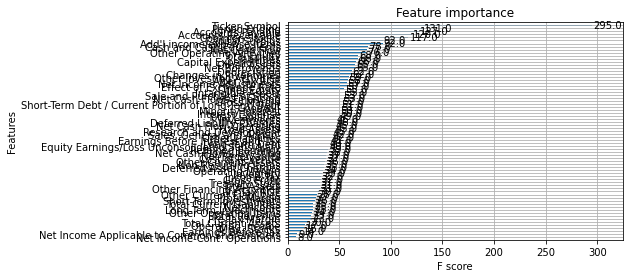

In [11]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Make a copy of df
imputed_df = df.copy()

# Preprocess the columns with object as data type

# label encoding
le = LabelEncoder()
imputed_df['Ticker Symbol'] = le.fit_transform(imputed_df['Ticker Symbol'])
imputed_df['Period Ending'] = pd.to_datetime(imputed_df['Period Ending']).dt.year

# List of columns to impute
columns_to_impute = ['Cash Ratio', 'Current Ratio', 'Quick Ratio', 'For Year', 'Earnings Per Share', 'Estimated Shares Outstanding']

# Function to impute missing values using XGBoost
def impute_missing_values(column_name):
    
    # Split dataset into two parts: one with missing values and the other without missing values
    data_with_missing = imputed_df[imputed_df[column_name].isnull()]
    data_without_missing = imputed_df[imputed_df[column_name].notnull()]

    # Split data_without_missing into X (features) and y (target)
    X = data_without_missing.drop(columns_to_impute, axis=1)
    y = data_without_missing[column_name]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE for {column_name}: {rmse}")
    
    # Checking importance of features to predict `Estimated Shares Outstanding`
    if column_name == "Estimated Shares Outstanding":
        xgb.plot_importance(model)
        plt.rcParams["figure.figsize"] = (20,20)
        plt.show()

    # Impute missing values using the trained model
    X_missing = data_with_missing.drop(columns_to_impute, axis=1)
    imputed_values = model.predict(X_missing)

    # Return the imputed values
    return imputed_values

# Impute missing values for each column and update the dataset
for column in columns_to_impute:
    imputed_values = impute_missing_values(column)
    imputed_df.loc[imputed_df[column].isnull(), column] = imputed_values

# Perform the inverse transformation of `Ticker Symbol`
imputed_df['Ticker Symbol'] = le.inverse_transform(imputed_df['Ticker Symbol'])

# drop `For Year` column as it has the same data as `Period Ending`
imputed_df = imputed_df.drop('For Year', axis=1)

# change data type of Period Ending
# imputed_df['Period Ending'] = imputed_df['Period Ending'].astype(str)

# Save the imputed dataset
imputed_df.to_csv('imputed_fundamentals.csv', index=False)

In [12]:
# Use the describe() function to get summary statistics for the original DataFrame
df.describe()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count      1.781000e+03         1.781000e+03                1.781000e+03   
mean       4.673418e+09        -6.353484e+07                6.908940e+07   
std        1.406047e+10         7.562794e+08                6.848143e+08   
min        0.000000e+00        -6.452000e+09               -6.768000e+09   
25%        5.160000e+08        -1.040000e+08               -2.638000e+06   
50%        1.334000e+09        -1.830000e+07                2.000000e+06   
75%        3.246000e+09         7.816000e+06                3.359200e+07   
max        2.069390e+11         2.266400e+10                1.416200e+10   

       After Tax ROE  Capital Expenditures  Capital Surplus   Cash Ratio  \
count    1781.000000          1.781000e+03     1.781000e+03  1482.000000   
mean       43.601348         -1.251925e+09     5.351784e+09    74.457490   
std       233.924028          2.979963e+09     1.133977e+10   102.298374   
min         0.000000         -3.798500e+10    -7.215000e+08     0.000000   
25%        10.000000         -1.151200e+09     4.791000e+08    17.000000   
50%        16.000000         -3.580000e+08     1.997080e+09    41.000000   
75%        26.000000         -1.291000e+08     5.735000e+09    90.000000   
max      5789.000000          5.000000e+06     1.082880e+11  1041.000000   

       Cash and Cash Equivalents  Changes in Inventories  Common Stocks  ...  \
count               1.781000e+03            1.781000e+03   1.781000e+03  ...   
mean                8.521399e+09           -6.787749e+07   1.608543e+09  ...   
std                 5.432105e+10            3.903369e+08   9.177636e+09  ...   
min                 2.100000e+04           -5.562000e+09   0.000000e+00  ...   
25%                 3.088000e+08           -5.400000e+07   1.628000e+06  ...   
50%                 8.625900e+08            0.000000e+00   7.725000e+06  ...   
75%                 2.310000e+09            0.000000e+00   2.970000e+08  ...   
max                 7.281110e+11            3.755000e+09   1.581420e+11  ...   

       Total Current Assets  Total Current Liabilities  Total Equity  \
count          1.781000e+03               1.781000e+03  1.781000e+03   
mean           6.726349e+09               4.699919e+09  1.188846e+10   
std            1.344800e+10               9.538832e+09  2.584429e+10   
min            0.000000e+00               0.000000e+00 -1.324400e+10   
25%            1.044178e+09               5.640760e+08  2.201492e+09   
50%            2.747200e+09               1.701500e+09  4.983000e+09   
75%            6.162000e+09               4.381000e+09  1.080900e+10   
max            1.396600e+11               9.028100e+10  2.562050e+11   

       Total Liabilities  Total Liabilities & Equity  Total Revenue  \
count       1.781000e+03                1.781000e+03   1.781000e+03   
mean        4.380420e+10                5.569266e+10   2.029154e+10   
std         1.817039e+11                2.033612e+11   4.095355e+10   
min         2.577000e+06                2.705000e+06   1.514000e+06   
25%         3.843300e+09                6.552689e+09   3.714000e+09   
50%         9.141000e+09                1.517000e+10   8.023200e+09   
75%         2.389700e+10                3.599710e+10   1.748600e+10   
max         2.340547e+12                2.572274e+12   4.856510e+11   

       Treasury Stock     For Year  Earnings Per Share  \
count    1.781000e+03  1608.000000         1562.000000   
mean    -3.951522e+09  2013.305348            3.353707   
std      1.407047e+10    19.953135            4.695896   
min     -2.297340e+11  1215.000000          -61.200000   
25%     -3.040895e+09  2013.000000            1.590000   
50%     -3.068350e+08  2014.000000            2.810000   
75%      0.000000e+00  2015.000000            4.590000   
max      0.000000e+00  2016.000000           50.090000   

       Estimated Shares Outstanding  
count                  1.562000e+03  
mean                   6.024

In [13]:
# Use the describe() function to get summary statistics for the imputed DataFrame
imputed_df.describe()

Period Ending  Accounts Payable  Accounts Receivable  \
count    1781.000000      1.781000e+03         1.781000e+03   
mean     2013.966873      4.673418e+09        -6.353484e+07   
std         1.308796      1.406047e+10         7.562794e+08   
min      2003.000000      0.000000e+00        -6.452000e+09   
25%      2013.000000      5.160000e+08        -1.040000e+08   
50%      2014.000000      1.334000e+09        -1.830000e+07   
75%      2015.000000      3.246000e+09         7.816000e+06   
max      2017.000000      2.069390e+11         2.266400e+10   

       Add'l income/expense items  After Tax ROE  Capital Expenditures  \
count                1.781000e+03    1781.000000          1.781000e+03   
mean                 6.908940e+07      43.601348         -1.251925e+09   
std                  6.848143e+08     233.924028          2.979963e+09   
min                 -6.768000e+09       0.000000         -3.798500e+10   
25%                 -2.638000e+06      10.000000         -1.151200e+09   
50%                  2.000000e+06      16.000000         -3.580000e+08   
75%                  3.359200e+07      26.000000         -1.291000e+08   
max                  1.416200e+10    5789.000000          5.000000e+06   

       Capital Surplus   Cash Ratio  Cash and Cash Equivalents  \
count     1.781000e+03  1781.000000               1.781000e+03   
mean      5.351784e+09   104.820032               8.521399e+09   
std       1.133977e+10   129.727000               5.432105e+10   
min      -7.215000e+08     0.000000               2.100000e+04   
25%       4.791000e+08    21.000000               3.088000e+08   
50%       1.997080e+09    51.000000               8.625900e+08   
75%       5.735000e+09   148.000000               2.310000e+09   
max       1.082880e+11  1041.000000               7.281110e+11   

       Changes in Inventories  ...  Total Assets  Total Current Assets  \
count            1.781000e+03  ...  1.781000e+03          1.781000e+03   
mean            -6.787749e+07  ...  5.570921e+10          6.726349e+09   
std              3.903369e+08  ...  2.033590e+11          1.344800e+10   
min             -5.562000e+09  ...  2.705000e+06          0.000000e+00   
25%             -5.400000e+07  ...  6.552689e+09          1.044178e+09   
50%              0.000000e+00  ...  1.517000e+10          2.747200e+09   
75%              0.000000e+00  ...  3.599710e+10          6.162000e+09   
max              3.755000e+09  ...  2.572274e+12          1.396600e+11   

       Total Current Liabilities  Total Equity  Total Liabilities  \
count               1.781000e+03  1.781000e+03       1.781000e+03   
mean                4.699919e+09  1.188846e+10       4.380420e+10   
std                 9.538832e+09  2.584429e+10       1.817039e+11   
min                 0.000000e+00 -1.324400e+10       2.577000e+06   
25%                 5.640760e+08  2.201492e+09       3.843300e+09   
50%                 1.701500e+09  4.983000e+09       9.141000e+09   
75%                 4.381000e+09  1.080900e+10       2.389700e+10   
max                 9.028100e+10  2.562050e+11       2.340547e+12   

       Total Liabilities & Equity  Total Revenue  Treasury Stock  \
count                1.781000e+03   1.781000e+03    1.781000e+03   
mean                 5.569266e+10   2.029154e+10   -3.951522e+09   
std                  2.033612e+11   4.095355e+10    1.407047e+10   
min                  2.705000e+06   1.514000e+06   -2.297340e+11   
25%                  6.552689e+09   3.714000e+09   -3.040895e+09   
50%                  1.517000e+10   8.023200e+09   -3.068350e+08   
75%                  3.599710e+10   1.748600e+10    0.000000e+00   
max                  2.572274e+12   4.856510e+11    0.000000e+00   

       Earnings Per Share  Estimated Shares Outstanding  
count         1781.000000                  1.781000e+03  
mean             3.324883                  6.013690e+08  
std              4.578361                  1.140376e+09  
min            -61.200000                 -

# (a)  I. Handling outliers - long-tailed distribution accompanied by a few true extreme outliers

In the Box plot visualizations presented below, the dataset demonstrates a significant distance between the interquartile range (IQR) and the data points above the 75th percentile (P75) and below the 25th percentile (Q25). This pattern is commonly referred to as a long-tailed or heavy-tailed distribution. While the majority of the columns exhibit this distribution pattern, some extreme values are noticeably far outside the typical long-tailed distribution. As such, it is more suitable to consider the data as having a long-tailed distribution accompanied by a few true extreme outliers.

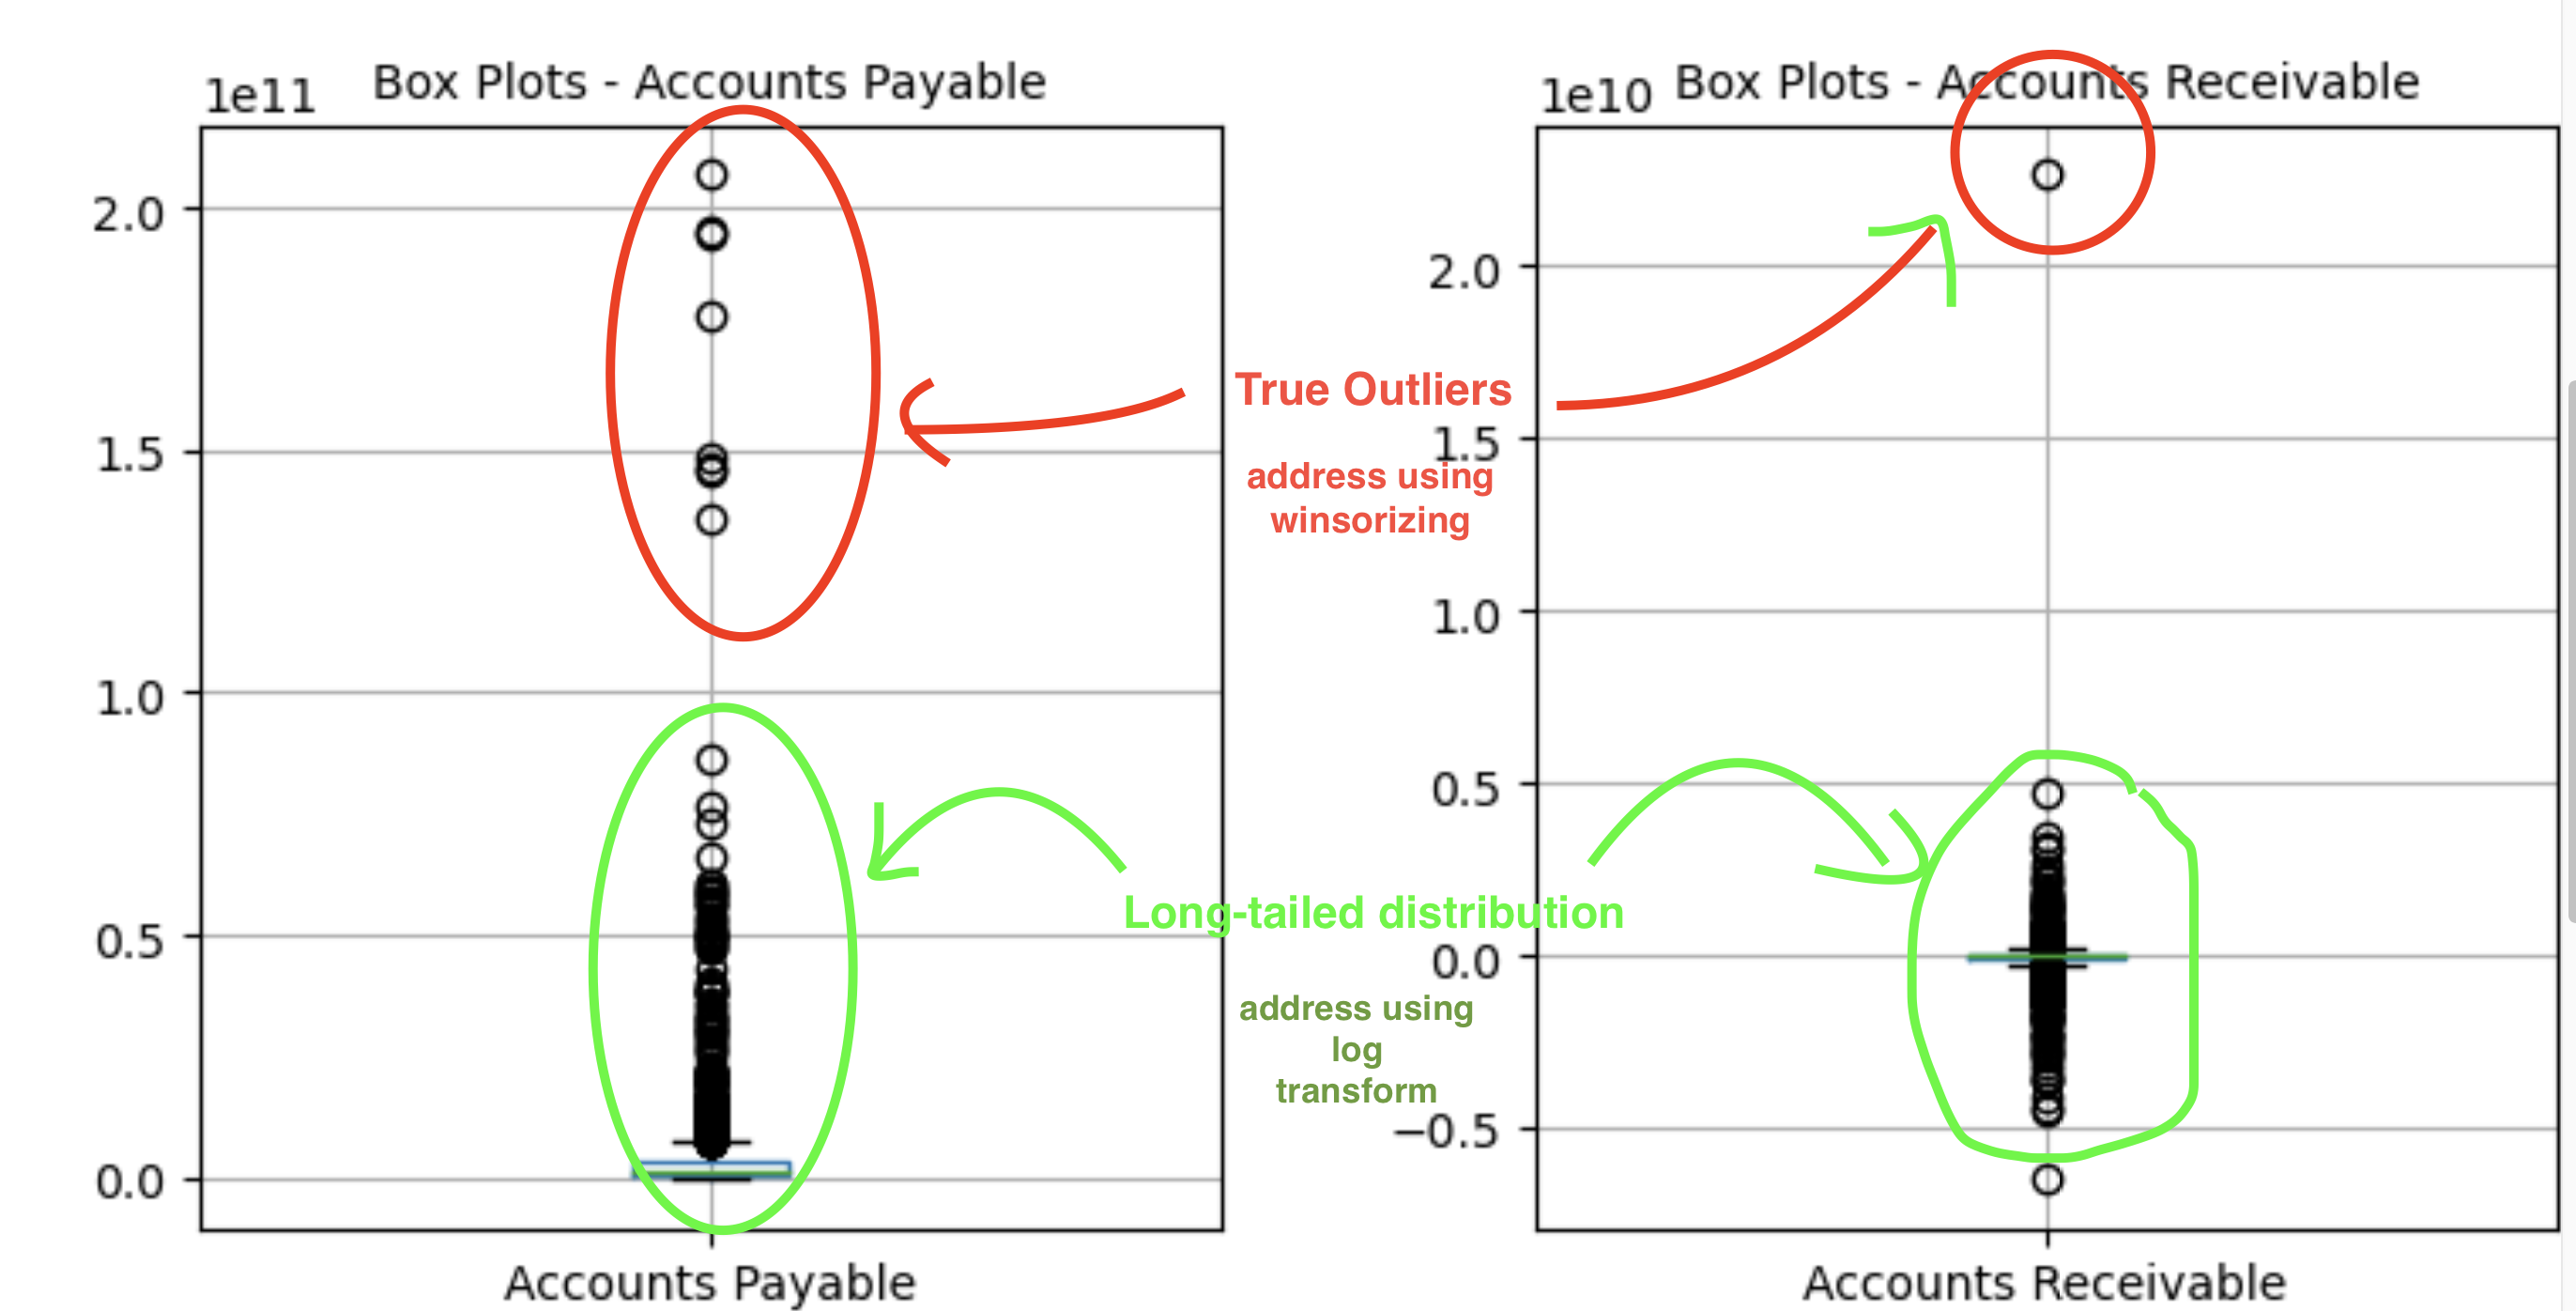

Below's I have written a function called `plot_data` that accepts the `plot_type` parameter, which you can set to `box`, `qq`, or `hist` to generate the corresponding plots.

In [14]:
selected_columns = ['Accounts Payable', 'Accounts Receivable', 'Common Stocks', 'Capital Surplus' , 'Cash and Cash Equivalents', 'Total Current Liabilities', 'Total Equity', 'Estimated Shares Outstanding']

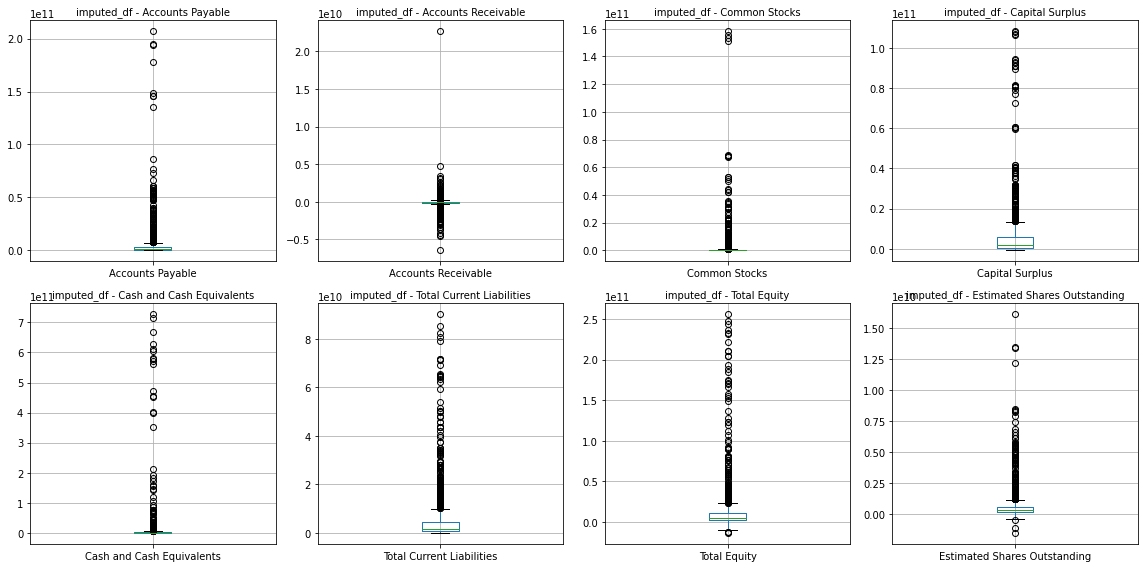

In [15]:
import matplotlib.pyplot as plt
import math
from scipy import stats

# `plot_data` function to reduce repeative coding
def plot_data(data, title = 'Box Plots', plot_type="box", max_columns_per_row = 4):
    if plot_type not in ["box", "qq", "hist"]:
        raise ValueError("Invalid plot type. Choose from 'box', 'qq', or 'hist'.")

    # Drop non-numeric columns
    numeric_data = data[selected_columns]

    # Determine the number of numeric columns
    num_columns = len(numeric_data.columns)

    # Calculate the number of rows and columns needed for subplots
    
    num_rows = math.ceil(num_columns / max_columns_per_row)

    # Create a single figure with subplots for each numeric column
    fig, axes = plt.subplots(nrows=num_rows, ncols=max_columns_per_row, figsize=(4 * max_columns_per_row, 4 * num_rows))

    # Flatten axes array if only one row of plots
    if num_rows == 1:
        axes = axes.flatten()
    else:
        axes = axes.ravel()

    # Create plots for each numeric column separately
    for idx, column in enumerate(numeric_data.columns):
        if plot_type == "box":
            numeric_data.boxplot(column=column, ax=axes[idx])
        elif plot_type == "qq":
            stats.probplot(numeric_data[column], plot=axes[idx])
        elif plot_type == "hist":
            axes[idx].hist(numeric_data[column])
        
        axes[idx].set_title(f"{title} - {column}", fontsize=10)

    # Remove unused subplots
    for idx in range(num_columns, num_rows * max_columns_per_row):
        fig.delaxes(axes[idx])

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the entire figure with all subplots
    plt.show()

# apply plot function to generate box plots of imputed df
plot_data(imputed_df, 'imputed_df')

## Winsorize the true outliers

For long-tailed distributions, the most effective method to pinpoint true outliers is to utilize a robust statistical approach that is less sensitive to data skewness. One such technique is Winsorizing, which limits the impact of extreme outliers in a dataset by replacing them with specific percentile values. This method is particularly advantageous for handling outliers in long-tailed or heavy-tailed distributions due to its reduced sensitivity to data skewness.


The Winsorizing process entails identifying the lower and upper percentiles of the dataset and subsequently replacing the outliers that fall below the lower percentile and above the upper percentile with their corresponding percentile values. For instance, if I have Winsorize at the 5th and 95th percentiles, the lower outliers will be replaced with the value at the 5th percentile, while the upper outliers will be replaced with the value at the 95th percentile.


Winsorizing is beneficial in mitigating the influence of extreme outliers on the dataset, which in turn can enhance the performance of machine learning models like linear regression. This technique is particularly valuable when addressing long-tailed distributions, where extreme values are prevalent but not necessarily indicative of the overall data. By constraining the impact of these extreme values, Winsorizing fosters a more balanced and representative dataset for analysis.

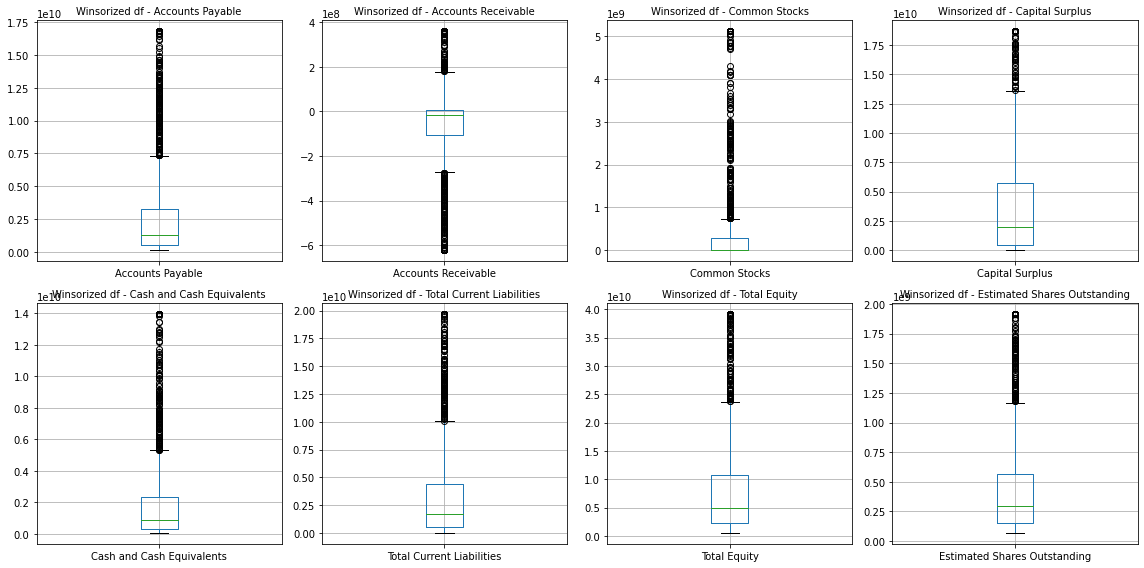

In [16]:
import pandas as pd
from scipy.stats.mstats import winsorize

# define winsorize function
def winsorize_dataframe(df, lower_percentile, upper_percentile):
    """
    Limits extreme values in all numeric columns of the DataFrame by replacing
    outliers with specific percentile values.

    :param df: Input pandas DataFrame
    :param lower_percentile: Lower percentile for winsorizing (0 <= lower_percentile <= 1)
    :param upper_percentile: Upper percentile for winsorizing (0 <= upper_percentile <= 1)
    :return: Winsorized DataFrame
    """

    # Make a copy of the DataFrame to avoid modifying the original data
    df_winsorized = df.copy()

    # Calculate the proportion of data to be winsorized
    lower_proportion = lower_percentile
    upper_proportion = 1 - upper_percentile

    # Iterate through all numeric columns
    for column in df_winsorized.select_dtypes(include=['float64', 'int64']):
        # Apply winsorization
        df_winsorized[column] = winsorize(df_winsorized[column], limits=(lower_proportion, upper_proportion))

    return df_winsorized


# apply winsorize function
imputed_winsorized_df = winsorize_dataframe(imputed_df, 0.05, 0.95)

# change the data type of  'Period Ending' column to string
imputed_winsorized_df['Period Ending'] = imputed_winsorized_df['Period Ending'].astype(str)

# apply plot function to generate box plots of winsorize df
plot_data(imputed_winsorized_df,  'Winsorized df')

# a) II) Q-Q Plots (S-shaped curve in a Q-Q plot)

As shown in the Q-Q plot visualizations below, S-shaped curve in the plot indicates that the data has a long-tailed distribution with a non-linear relationship to the normal distribution. Log transformation can be applied to linearize this relationship and make the data more normally distributed. This transformation reduces skewness and improves the performance of statistical and machine learning models that assume normality.

### Apply plot function to generate q-q plots of original df

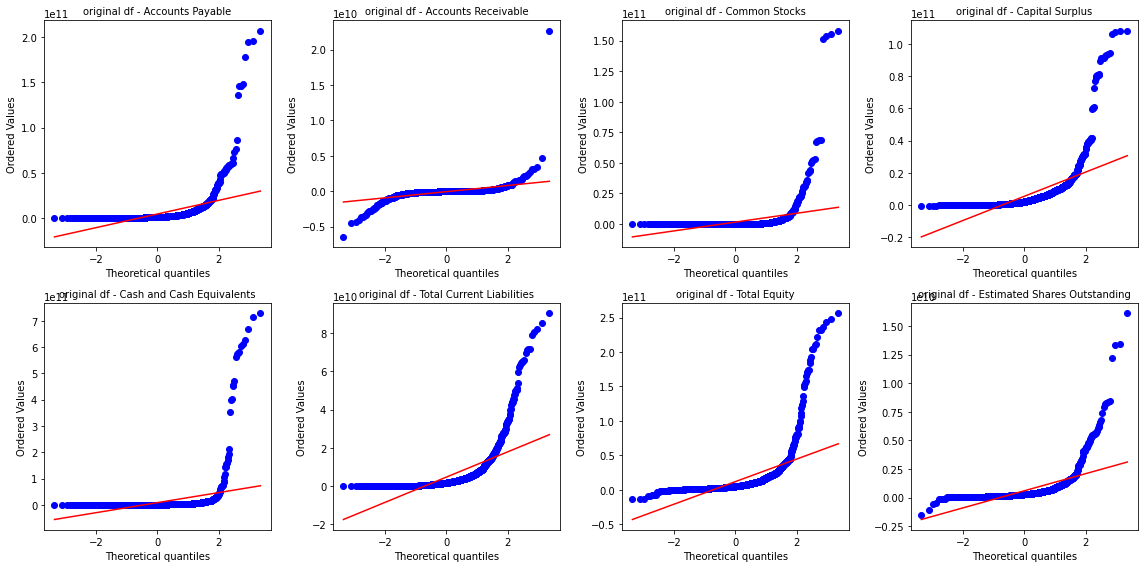

In [17]:
# apply plot function to generate q-q plots of original df
plot_data(imputed_df, 'original df', plot_type="qq")

### Apply plot function to generate q-q plots of winsorize df

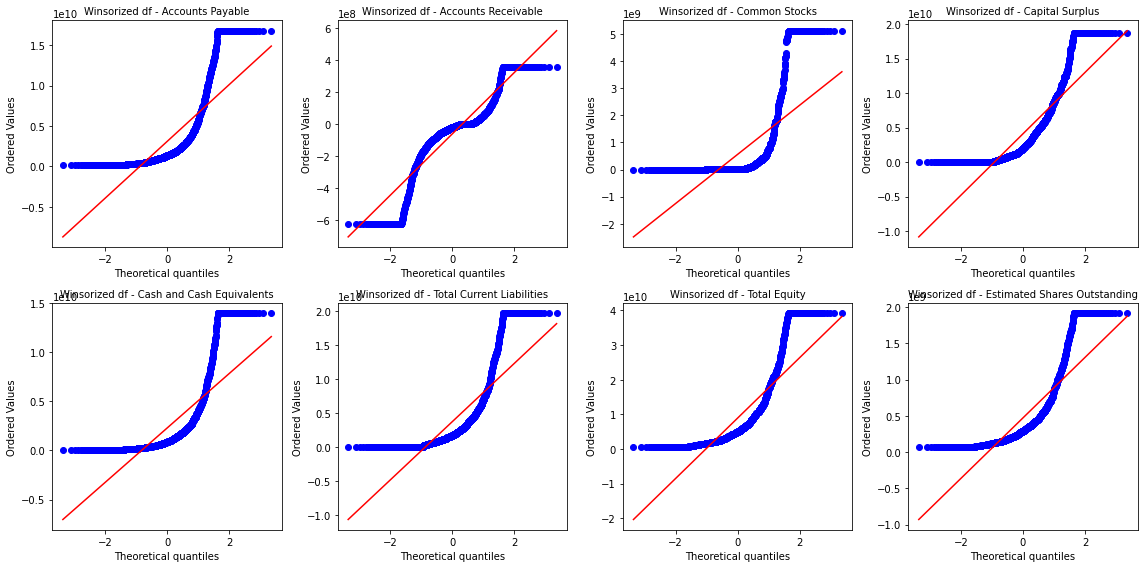

In [18]:
# apply plot function to generate q-q plots of winsorize df
plot_data(imputed_winsorized_df, 'Winsorized df', plot_type="qq")

# a) II) Histograms - positively skewed (right-skewed) or negatively skewed (left-skewed) 

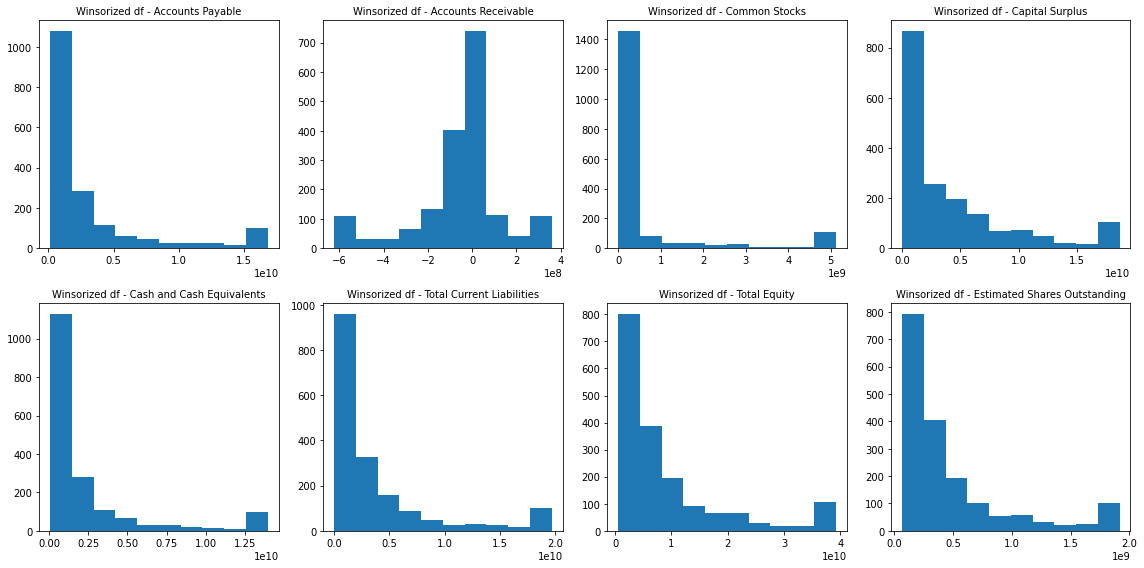

In [19]:
# apply plot function to generate histograms plots of winsorize df
plot_data(imputed_winsorized_df, 'Winsorized df', plot_type="hist")

## Apply log transformation (S-shaped curve in a Q-Q plot)

The code cell output below displays the columns in the dataset containing negative values. Since the log transformation cannot handle negative values, we need to adjust these columns before applying the transformation. By using the highest negative value of each feature with negative values as a constant addition, we can shift all column values into a positive range, making it suitable for log transformation.

Adopting this approach allows us to apply the log transformation while preserving the relationships between the original features and the target variable. This method is more straightforward and less prone to introducing unintended side effects in the model. It ensures that the transformed features maintain their original information, which is essential for accurate modeling and prediction.

In [20]:
columns_with_negative_values = []

for column in imputed_winsorized_df.columns:
    if (imputed_winsorized_df[column].dtype == 'float64' or imputed_winsorized_df[column].dtype == 'int64') and imputed_winsorized_df[column].min() < 0:
        columns_with_negative_values.append(column)

print("Columns with negative values:")
for column in columns_with_negative_values:
    print(column)

Columns with negative values:
Accounts Receivable
Add'l income/expense items
Capital Expenditures
Changes in Inventories
Effect of Exchange Rate
Equity Earnings/Loss Unconsolidated Subsidiary
Income Tax
Investments
Liabilities
Net Borrowings
Net Cash Flow
Net Cash Flows-Financing
Net Cash Flows-Investing
Net Income
Net Income Adjustments
Net Income Applicable to Common Shareholders
Net Income-Cont. Operations
Other Equity
Other Financing Activities
Other Investing Activities
Other Operating Activities
Retained Earnings
Sale and Purchase of Stock
Treasury Stock
Earnings Per Share


In [21]:
imputed_winsorized_df

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0              AAL          2012      3.068000e+09         -222000000.0   
1              AAL          2013      4.975000e+09          -93000000.0   
2              AAL          2014      4.668000e+09         -160000000.0   
3              AAL          2015      5.102000e+09          352000000.0   
4              AAP          2012      2.409453e+09          -89482000.0   
...            ...           ...               ...                  ...   
1776          ZION          2015      1.413110e+08                  0.0   
1777           ZTS          2013      1.381000e+09          -99000000.0   
1778           ZTS          2014      1.071000e+09           69000000.0   
1779           ZTS          2015      1.313000e+09          -58000000.0   
1780           ZTS          2016      1.076000e+09           15000000.0   

      Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0                   -166000000.0           23.0         -1.888000e+09   
1                   -166000000.0           67.0         -3.114000e+09   
2                   -150000000.0           88.0         -4.893000e+09   
3                   -166000000.0           88.0         -4.893000e+09   
4                       600000.0           32.0         -2.711820e+08   
...                          ...            ...                   ...   
1776                  -2530000.0            4.0         -1.573610e+08   
1777                   9000000.0           54.0         -1.840000e+08   
1778                  -7000000.0           44.0         -1.800000e+08   
1779                 -81000000.0           32.0         -2.240000e+08   
1780                   2000000.0           55.0         -2.160000e+08   

      Capital Surplus  Cash Ratio  Cash and Cash Equivalents  ...  \
0        4.695000e+09   53.000000               1.330000e+09  ...   
1        1.059200e+10   75.000000               2.175000e+09  ...   
2        1.513500e+10   60.000000               1.768000e+09  ...   
3        1.159100e+10   51.000000               1.085000e+09  ...   
4        5.202150e+08   23.000000               5.981110e+08  ...   
...               ...         ...                        ...  ...   
1776     0.000000e+00  201.647552               1.396843e+10  ...   
1777     8.780000e+08   43.000000               6.100000e+08  ...   
1778     9.580000e+08   81.000000               8.820000e+08  ...   
1779     1.012000e+09   65.000000               1.154000e+09  ...   
1780     1.024000e+09   65.000000               7.270000e+08  ...   

      Total Assets  Total Current Assets  Total Current Liabilities  \
0     2.351000e+10          7.072000e+09               9.011000e+09   
1     4.227800e+10          1.432300e+10               1.380600e+10   
2     4.322500e+10          1.175000e+10               1.340400e+10   
3     4.841500e+10          9.985000e+09               1.360500e+10   
4     4.613814e+09          3.184200e+09               2.559638e+09   
...            ...                   ...                        ...   
1776  5.966952e+10          0.000000e+00               0.000000e+00   
1777  6.558000e+09          3.357000e+09               1.415000e+09   
1778  6.588000e+09          3.465000e+09               1.086000e+09   
1779  7.913000e+09          3.830000e+09               1.781000e+09   
1780  7.649000e+09          3.390000e+09               1.117000e+09   

      Total Equity  Total Liabilities  Total Liabilities & Equity  \
0     5.475890e+08       2.489100e+10                1.690400e+10   
1     5.475890e+08       4.500900e+10                4.227800e+10   
2     2.021000e+09       4.120400e+10                4.322500e+10   
3     5.635000e+09       4.278000e+10                4.841500e+10   
4     1.210694e+09       3.403120e+09                4.613814e+09   
...            ...                ...                         ...   
1776  7.507519e+09       5.216201e+10                5.966952e

### Apply log transform to winsorized df

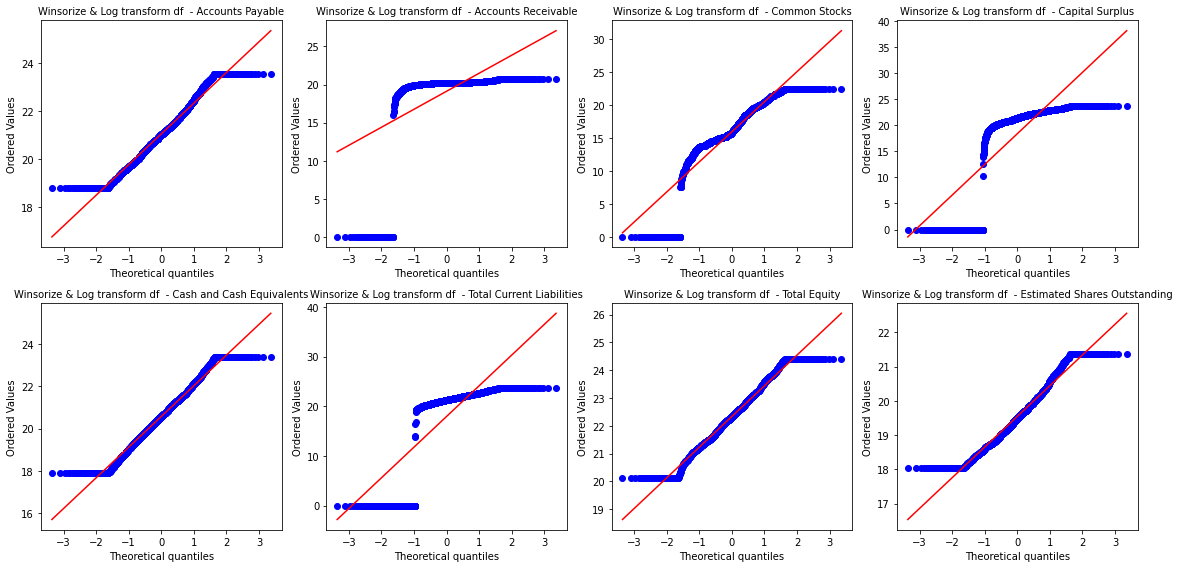

In [41]:
# define log transform function
def log_transform_dataframe_v2(df):
    log_transformed_df = pd.DataFrame()

    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            # Convert integers to float
            if df[column].dtype == 'int64':
                df[column] = df[column].astype('float64')

            # Find the minimum value in the column
            min_val = df[column].min()

            # If the minimum value is negative, shift all values to make them positive
            if min_val <= 0:
                shift = abs(min_val) + 1
                log_transformed_df[column] = np.log(df[column] + shift)
            else:
                log_transformed_df[column] = np.log(df[column])

        else:
            log_transformed_df[column] = df[column]

    return log_transformed_df

# Apply log transform to winsorized df
imputed_winsorized_log_df = log_transform_dataframe_v2(imputed_winsorized_df)

# apply plot function to generate q-q plots of winsorize and log transformed df
plot_data(imputed_winsorized_log_df, 'Winsorize & Log transform df ', plot_type="qq")

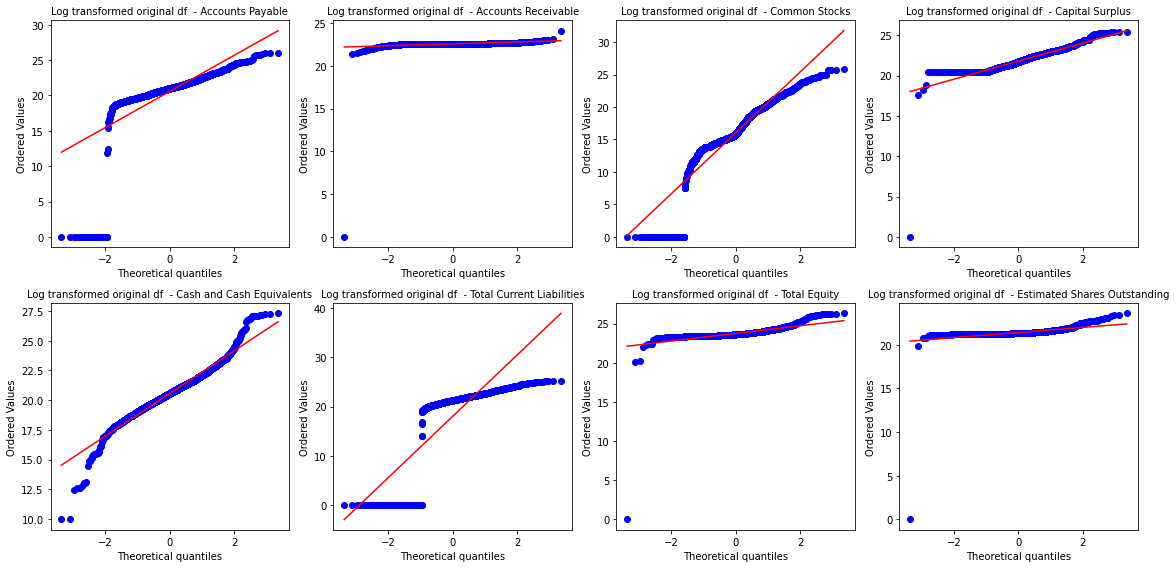

In [42]:
# Apply log transform to original df
imputed_log_df_v2 = log_transform_dataframe_v2(imputed_df)

# apply plot function to generate q-q plots of log transformed original df
plot_data(imputed_log_df_v2, 'Log transformed original df ', plot_type="qq")

In [43]:
imputed_winsorized_log_df

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0              AAL          2012         21.844292            19.809472   
1              AAL          2013         22.327691            20.088388   
2              AAL          2014         22.263997            19.953238   
3              AAL          2015         22.352898            20.697948   
4              AAP          2012         21.602666            20.095003   
...            ...           ...               ...                  ...   
1776          ZION          2015         18.766474            20.250057   
1777           ZTS          2013         21.046074            20.077002   
1778           ZTS          2014         20.791859            20.355097   
1779           ZTS          2015         20.995580            20.152336   
1780           ZTS          2016         20.796516            20.273849   

      Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0                       0.000000       3.135494             21.823543   
1                       0.000000       4.204693             21.299317   
2                      16.588099       4.477337              0.000000   
3                       0.000000       4.477337              0.000000   
4                      18.931106       3.465736             22.254054   
...                          ...            ...                   ...   
1776                   18.912140       1.386294             22.278383   
1777                   18.980297       3.988984             22.272741   
1778                   18.884415       3.784190             22.273590   
1779                   18.258162       3.465736             22.264211   
1780                   18.939475       4.007333             22.265923   

      Capital Surplus  Cash Ratio  Cash and Cash Equivalents  ...  \
0           22.269764    3.970292                  21.008445  ...   
1           23.083365    4.317488                  21.500295  ...   
2           23.440276    4.094345                  21.293115  ...   
3           23.173495    3.931826                  20.804846  ...   
4           20.069753    3.135494                  20.209287  ...   
...               ...         ...                        ...  ...   
1776         0.000000    5.306521                  23.360066  ...   
1777        20.593157    3.761200                  20.228970  ...   
1778        20.680358    4.394449                  20.597703  ...   
1779        20.735194    4.174387                  20.866500  ...   
1780        20.746982    4.174387                  20.404437  ...   

      Total Assets  Total Current Assets  Total Current Liabilities  \
0        23.880692             22.679409                  22.921712   
1        24.467533             23.385132                  23.348369   
2        24.489685             23.187119                  23.318819   
3        24.603076             23.024350                  23.333703   
4        22.252321             21.881467                  21.663132   
...            ...                   ...                        ...   
1776     24.812087              0.000000                   0.000000   
1777     22.603952             21.934314                  21.070395   
1778     22.608516             21.965978                  20.805767   
1779     22.791773             22.066131                  21.300441   
1780     22.757841             21.944096                  20.833912   

      Total Equity  Total Liabilities  Total Liabilities & Equity  \
0        20.121036          23.937772                   23.550816   
1        20.121036          24.530128                   24.467533   
2        21.426858          24.441801                   24.489685   
3        22.452263          24.479337                   24.603076   
4        20.914460          21.947958                   22.252321   
...            ...                ...                         ...   
1776     22.739171          24.677620                   24.812

### Effect of winsorization and log transform on original dataframe 

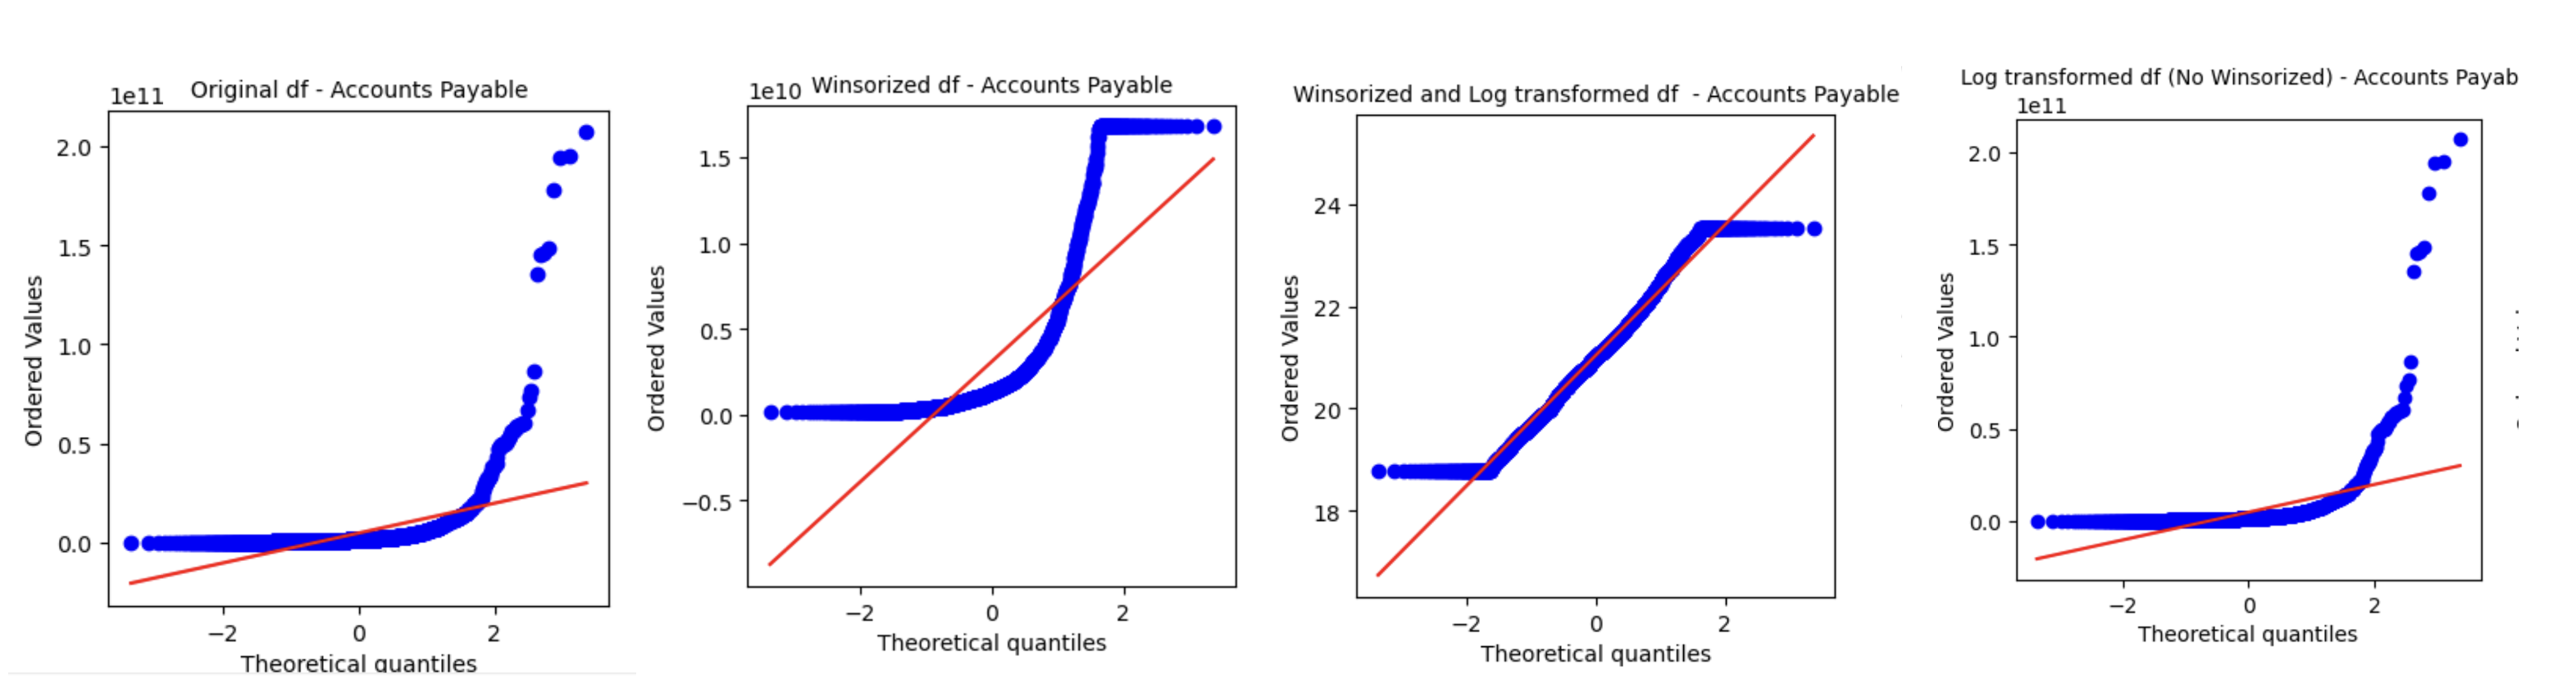


# a) III) feature coding techniques

As per the cell output below, the `Ticker Symbol` column is a categorical feature. Therefore, we need to transform the `Ticker Symbol` column into a numerical format before further analysis with linear regression. The `Ticker Symbol` column contains 448 unique categories. One-hot encoding may not be the most suitable choice when dealing with a categorical feature containing numerous categories like this, as it can lead to high dimensionality (448 new columns) and increased computational complexity.

In [44]:
# Identify columns with categorical features in the DataFrame
imputed_winsorized_log_df.select_dtypes(include=['object', 'category']).columns

Index(['Ticker Symbol', 'Period Ending'], dtype='object')

In [45]:
# Count the number of occurrences for each categorical value in the `Ticker Symbol` column
imputed_winsorized_log_df.groupby('Ticker Symbol').size().reset_index(name='Count')

Ticker Symbol  Count
0             AAL      4
1             AAP      4
2            AAPL      4
3            ABBV      4
4             ABC      4
..            ...    ...
443          YHOO      4
444           YUM      4
445           ZBH      4
446          ZION      4
447           ZTS      4

[448 rows x 2 columns]

In [46]:
imputed_winsorized_log_df.groupby('Period Ending').size().reset_index(name='Count')

Period Ending  Count
0          2012    240
1          2013    439
2          2014    436
3          2015    445
4          2016    221

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to 'Period Ending' column
label_encoder = LabelEncoder()
imputed_winsorized_log_df['Period_Ending_Label'] = label_encoder.fit_transform(imputed_winsorized_log_df['Period Ending'])

# Apply one-hot encoding to 'Period Ending' column
period_ending_one_hot = pd.get_dummies(imputed_winsorized_log_df['Period Ending'], prefix='Period_Ending')

# Drop the original 'Period Ending' column and concatenate the one-hot encoded DataFrame
imputed_winsorized_log_df = imputed_winsorized_log_df.drop('Period Ending', axis=1)
imputed_winsorized_log_df_v2 = pd.concat([imputed_winsorized_log_df, period_ending_one_hot], axis=1)

# Print the modified DataFrame
imputed_winsorized_log_df_v2.head()

Ticker Symbol  Accounts Payable  Accounts Receivable  \
0           AAL         21.844292            19.809472   
1           AAL         22.327691            20.088388   
2           AAL         22.263997            19.953238   
3           AAL         22.352898            20.697948   
4           AAP         21.602666            20.095003   

   Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0                    0.000000       3.135494             21.823543   
1                    0.000000       4.204693             21.299317   
2                   16.588099       4.477337              0.000000   
3                    0.000000       4.477337              0.000000   
4                   18.931106       3.465736             22.254054   

   Capital Surplus  Cash Ratio  Cash and Cash Equivalents  \
0        22.269764    3.970292                  21.008445   
1        23.083365    4.317488                  21.500295   
2        23.440276    4.094345                  21.293115   
3        23.173495    3.931826                  20.804846   
4        20.069753    3.135494                  20.209287   

   Changes in Inventories  ...  Total Revenue  Treasury Stock  \
0               19.796925  ...      23.936325       23.572410   
1               19.796925  ...      24.009539       23.593435   
2               19.796925  ...      24.476293       23.593435   
3               19.796925  ...      24.436594       23.593435   
4               18.725972  ...      22.548622       23.591898   

   Earnings Per Share  Estimated Shares Outstanding  Period_Ending_Label  \
0            0.000000                     19.629641                    0   
1            0.000000                     18.909397                    1   
2            1.673351                     20.390468                    2   
3            2.288486                     20.319993                    3   
4            1.887070                     18.109847                    0   

   Period_Ending_2012  Period_Ending_2013  Period_Ending_2014  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   0                   1   
3                   0                   0                   0   
4                   1                   0                   0   

   Period_Ending_2015  Period_Ending_2016  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   1                   0  
4                   0                   0  

[5 rows x 82 columns]

## Label encoding followed by embeddings

Using label encoding followed by embeddings is an effective approach when dealing with high cardinality categorical features. This method can capture relationships between categories and the target variable while minimizing dimensionality. Here's an overview of the process:

- Label Encoding: Assign an integer value to each category. This step converts the categorical feature into numerical values that can be used as input for the embedding layer.
- Embedding: After label encoding, utilize an embedding layer to map the integer-encoded categories to a continuous vector space. Embeddings can capture intricate relationships between categories and reduce dimensionality, making them suitable for handling categorical features with many categories.


When selecting the embedding vector size for 448 categories, it is common to follow the general rule of thumb: the size should be roughly the square root of the number of unique categories.
For instance, in this case, with 448 unique categories, I have calculated the suggested embedding size as follows:

`Square root: sqrt(448) ≈ 21`

By choosing an embedding vector size of approximately 21, I aim to balance capturing the complexity of the relationships between categories and avoiding overfitting or excessive computational complexity. However, it's essential to experiment with or do hyperparameter optimization with different sizes to find the best one for this problem and dataset.

In [48]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to the Ticker Symbol column
le = LabelEncoder()
imputed_winsorized_log_df_v2['Ticker Symbol_encoded'] = le.fit_transform(imputed_winsorized_log_df_v2['Ticker Symbol'])

# Define the number of unique categories
num_categories = len(np.unique(imputed_winsorized_log_df_v2['Ticker Symbol_encoded']))

# Define the embedding vector size
embedding_vector_size = 21

# Create the embedding layer in Keras
embedding_layer = tf.keras.layers.Embedding(input_dim=num_categories, output_dim=embedding_vector_size, input_length=1)

# Convert the label-encoded column to a tensor
ticker_symbol_tensor = tf.convert_to_tensor(imputed_winsorized_log_df_v2['Ticker Symbol_encoded'].values)

# Add an extra dimension to match the input shape of the embedding layer
ticker_symbol_tensor = tf.expand_dims(ticker_symbol_tensor, axis=-1)

# Pass the tensor through the embedding layer
embedded_tensor = embedding_layer(ticker_symbol_tensor)

# Remove the extra dimension
embedded_tensor = tf.squeeze(embedded_tensor, axis=1)

# Convert the output tensor back to a Pandas DataFrame
embedded_df = pd.DataFrame(embedded_tensor.numpy(), columns=[f'Ticker Symbol_embedding_{i}' for i in range(embedding_vector_size)])

In [49]:
embedded_df.head()

Ticker Symbol_embedding_0  Ticker Symbol_embedding_1  \
0                   0.042434                   0.024977   
1                   0.042434                   0.024977   
2                   0.042434                   0.024977   
3                   0.042434                   0.024977   
4                   0.031420                  -0.006531   

   Ticker Symbol_embedding_2  Ticker Symbol_embedding_3  \
0                   0.046281                   0.023232   
1                   0.046281                   0.023232   
2                   0.046281                   0.023232   
3                   0.046281                   0.023232   
4                   0.014514                  -0.034825   

   Ticker Symbol_embedding_4  Ticker Symbol_embedding_5  \
0                   0.020921                   0.009639   
1                   0.020921                   0.009639   
2                   0.020921                   0.009639   
3                   0.020921                   0.009639   
4                  -0.000060                   0.026428   

   Ticker Symbol_embedding_6  Ticker Symbol_embedding_7  \
0                  -0.042036                   0.027116   
1                  -0.042036                   0.027116   
2                  -0.042036                   0.027116   
3                  -0.042036                   0.027116   
4                  -0.042298                   0.006585   

   Ticker Symbol_embedding_8  Ticker Symbol_embedding_9  ...  \
0                   0.012812                  -0.039112  ...   
1                   0.012812                  -0.039112  ...   
2                   0.012812                  -0.039112  ...   
3                   0.012812                  -0.039112  ...   
4                  -0.009846                   0.005131  ...   

   Ticker Symbol_embedding_11  Ticker Symbol_embedding_12  \
0                    0.009250                   -0.019489   
1                    0.009250                   -0.019489   
2                    0.009250                   -0.019489   
3                    0.009250                   -0.019489   
4                   -0.010437                   -0.036733   

   Ticker Symbol_embedding_13  Ticker Symbol_embedding_14  \
0                   -0.034067                   -0.033091   
1                   -0.034067                   -0.033091   
2                   -0.034067                   -0.033091   
3                   -0.034067                   -0.033091   
4                    0.048471                    0.012759   

   Ticker Symbol_embedding_15  Ticker Symbol_embedding_16  \
0                    0.042376                    0.014252   
1                    0.042376                    0.014252   
2                    0.042376                    0.014252   
3                    0.042376                    0.014252   
4                    0.007744                    0.013270   

   Ticker Symbol_embedding_17  Ticker Symbol_embedding_18  \
0                    0.020857                   -0.021468   
1                    0.020857                   -0.021468   
2                    0.020857                   -0.021468   
3                    0.020857                   -0.021468   
4                    0.015422                   -0.000138   

   Ticker Symbol_embedding_19  Ticker Symbol_embedding_20  
0                   -0.015593                    0.046576  
1                   -0.015593                    0.046576  
2                   -0.015593                    0.046576  
3                   -0.015593                    0.046576  
4                   -0.028663                    0.030709  

[5 rows x 21 columns]

In [50]:
# Concatenate the original DataFrame with the new DataFrame containing the embeddings
preprocessed_df = pd.concat([imputed_winsorized_log_df_v2, embedded_df], axis=1)
# Droping original 'Ticker Symbol' column
preprocessed_df.drop('Ticker Symbol', axis=1, inplace=True)

preprocessed_df.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0         21.844292            19.809472                    0.000000   
1         22.327691            20.088388                    0.000000   
2         22.263997            19.953238                   16.588099   
3         22.352898            20.697948                    0.000000   
4         21.602666            20.095003                   18.931106   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0       3.135494             21.823543        22.269764    3.970292   
1       4.204693             21.299317        23.083365    4.317488   
2       4.477337              0.000000        23.440276    4.094345   
3       4.477337              0.000000        23.173495    3.931826   
4       3.465736             22.254054        20.069753    3.135494   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  ...  \
0                  21.008445               19.796925      18.659698  ...   
1                  21.500295               19.796925      15.424949  ...   
2                  21.293115               19.796925      15.761421  ...   
3                  20.804846               19.796925      15.607270  ...   
4                  20.209287               18.725972       8.853808  ...   

   Ticker Symbol_embedding_11  Ticker Symbol_embedding_12  \
0                    0.009250                   -0.019489   
1                    0.009250                   -0.019489   
2                    0.009250                   -0.019489   
3                    0.009250                   -0.019489   
4                   -0.010437                   -0.036733   

   Ticker Symbol_embedding_13  Ticker Symbol_embedding_14  \
0                   -0.034067                   -0.033091   
1                   -0.034067                   -0.033091   
2                   -0.034067                   -0.033091   
3                   -0.034067                   -0.033091   
4                    0.048471                    0.012759   

   Ticker Symbol_embedding_15  Ticker Symbol_embedding_16  \
0                    0.042376                    0.014252   
1                    0.042376                    0.014252   
2                    0.042376                    0.014252   
3                    0.042376                    0.014252   
4                    0.007744                    0.013270   

   Ticker Symbol_embedding_17  Ticker Symbol_embedding_18  \
0                    0.020857                   -0.021468   
1                    0.020857                   -0.021468   
2                    0.020857                   -0.021468   
3                    0.020857                   -0.021468   
4                    0.015422                   -0.000138   

   Ticker Symbol_embedding_19  Ticker Symbol_embedding_20  
0                   -0.015593                    0.046576  
1                   -0.015593                    0.046576  
2                   -0.015593                    0.046576  
3                   -0.015593                    0.046576  
4                   -0.028663                    0.030709  

[5 rows x 103 columns]

In [51]:
preprocessed_df.columns.tolist()[:-29]

['Accounts Payable',
 'Accounts Receivable',
 "Add'l income/expense items",
 'After Tax ROE',
 'Capital Expenditures',
 'Capital Surplus',
 'Cash Ratio',
 'Cash and Cash Equivalents',
 'Changes in Inventories',
 'Common Stocks',
 'Cost of Revenue',
 'Current Ratio',
 'Deferred Asset Charges',
 'Deferred Liability Charges',
 'Depreciation',
 'Earnings Before Interest and Tax',
 'Earnings Before Tax',
 'Effect of Exchange Rate',
 'Equity Earnings/Loss Unconsolidated Subsidiary',
 'Fixed Assets',
 'Goodwill',
 'Gross Margin',
 'Gross Profit',
 'Income Tax',
 'Intangible Assets',
 'Interest Expense',
 'Inventory',
 'Investments',
 'Liabilities',
 'Long-Term Debt',
 'Long-Term Investments',
 'Minority Interest',
 'Misc. Stocks',
 'Net Borrowings',
 'Net Cash Flow',
 'Net Cash Flow-Operating',
 'Net Cash Flows-Financing',
 'Net Cash Flows-Investing',
 'Net Income',
 'Net Income Adjustments',
 'Net Income Applicable to Common Shareholders',
 'Net Income-Cont. Operations',
 'Net Receivables',


# a) IV) Scaling/ standardizing with robust scaling

The dataset exhibits an extremely long-tailed data distribution, and our goal is to use linear regression. Min-max scaling is sensitive to outliers, making it unsuitable for data with extreme outliers. Standard scaling assumes the data follows a normal distribution, but our dataset displays a highly skewed nature.

Robust scaling is an appropriate choice for datasets with outliers or skewed data since it scales features based on percentiles (typically the interquartile range). This method is less sensitive to outliers and does not assume any specific data distribution. By using Robust scaling, we can effectively mitigate the impact of extreme values on our linear regression model.

In [52]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming result_df is your DataFrame
# Create a list of columns to scale, excluding 'Estimated Shares Outstanding'
# columns_to_scale = [col for col in preprocessed_df.columns if col != 'Estimated Shares Outstanding']
columns_to_scale = preprocessed_df.columns.tolist()[:-29]
# Instantiate the RobustScaler
scaler = RobustScaler()

# Fit and transform the selected columns
preprocessed_df[columns_to_scale] = scaler.fit_transform(preprocessed_df[columns_to_scale])

In [55]:
preprocessed_df.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0          0.452861            -2.105327                  -94.552384   
1          0.715711            -0.675799                  -94.552384   
2          0.681077            -1.368484                  -11.738875   
3          0.729417             2.448384                  -94.552384   
4          0.321476            -0.641891                   -0.041777   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0       0.379802             -1.704131         0.344344    0.019699   
1       1.498783             -3.874841         0.672088    0.197503   
2       1.784121            -92.070815         0.815862    0.083228   
3       1.784121            -92.070815         0.708395    0.000000   
4       0.725420              0.078522        -0.541887   -0.407813   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  ...  \
0                   0.215173                0.000000       0.537749  ...   
1                   0.459594                0.000000      -0.083556  ...   
2                   0.356637                0.000000      -0.018929  ...   
3                   0.113996                0.000000      -0.048537  ...   
4                  -0.181962               -7.305099      -1.345688  ...   

   Ticker Symbol_embedding_11  Ticker Symbol_embedding_12  \
0                    0.009250                   -0.019489   
1                    0.009250                   -0.019489   
2                    0.009250                   -0.019489   
3                    0.009250                   -0.019489   
4                   -0.010437                   -0.036733   

   Ticker Symbol_embedding_13  Ticker Symbol_embedding_14  \
0                   -0.034067                   -0.033091   
1                   -0.034067                   -0.033091   
2                   -0.034067                   -0.033091   
3                   -0.034067                   -0.033091   
4                    0.048471                    0.012759   

   Ticker Symbol_embedding_15  Ticker Symbol_embedding_16  \
0                    0.042376                    0.014252   
1                    0.042376                    0.014252   
2                    0.042376                    0.014252   
3                    0.042376                    0.014252   
4                    0.007744                    0.013270   

   Ticker Symbol_embedding_17  Ticker Symbol_embedding_18  \
0                    0.020857                   -0.021468   
1                    0.020857                   -0.021468   
2                    0.020857                   -0.021468   
3                    0.020857                   -0.021468   
4                    0.015422                   -0.000138   

   Ticker Symbol_embedding_19  Ticker Symbol_embedding_20  
0                   -0.015593                    0.046576  
1                   -0.015593                    0.046576  
2                   -0.015593                    0.046576  
3                   -0.015593                    0.046576  
4                   -0.028663                    0.030709  

[5 rows x 103 columns]

## Visualize effect of scaling/standardizing (robust scaling)

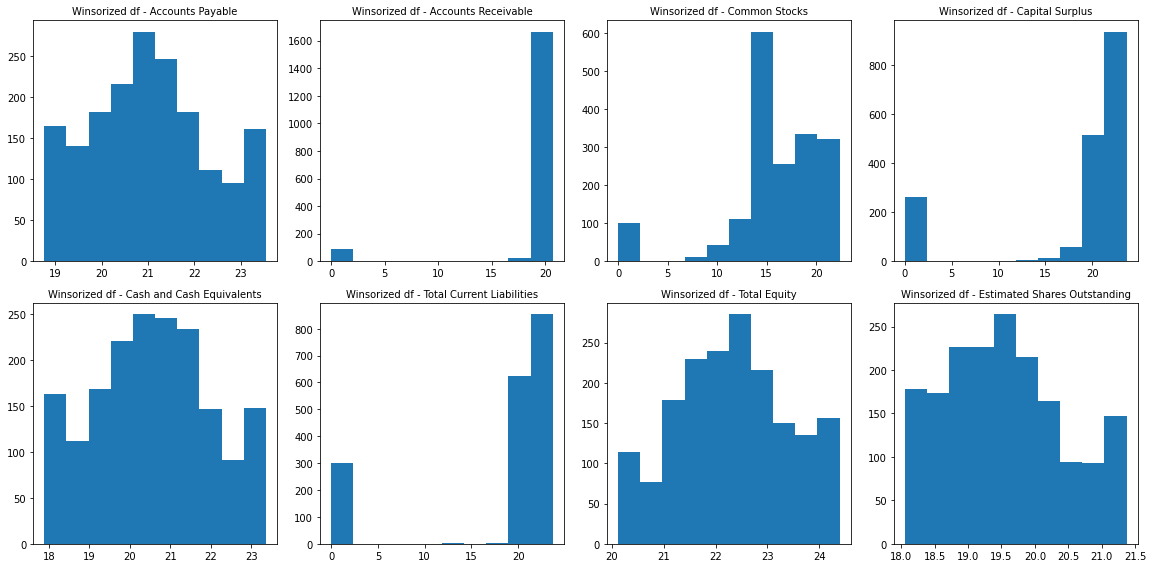

In [56]:
# apply plot function to generate histograms plots of winsorize df
plot_data(imputed_winsorized_log_df, 'Winsorized df', plot_type="hist")

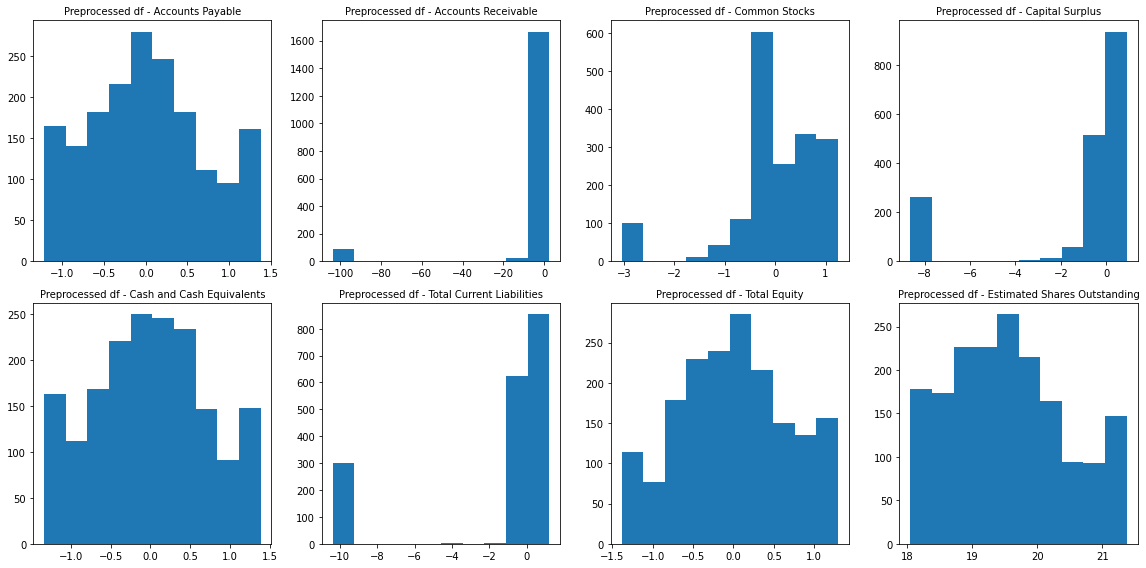

In [57]:
# apply plot function to generate histograms plots of winsorize df
plot_data(preprocessed_df, 'Preprocessed df', plot_type="hist")

# a) V)  Feature Discretization

I have visually inspected scatterplots of the feature variables against the target variable to identify any feature discretization requirements. The scatterplots in the cell output below show that some columns have a relationship between the feature and the target variable exhibiting non-linear patterns, distinct groups, or multiple clusters.


In such cases, employing a discretization method that can adapt to the data distribution is often beneficial. Methods like k-Means clustering or decision tree-based discretization are suitable for these situations. I have chosen k-Means clustering for discretization because it can effectively identify clusters in the data and create bins accordingly. Additionally, it is less sensitive to noise and adept at handling irregular patterns and multiple clusters.

Below code will create scatter plots for the selected set of columns in df, with 6 columns per row. 

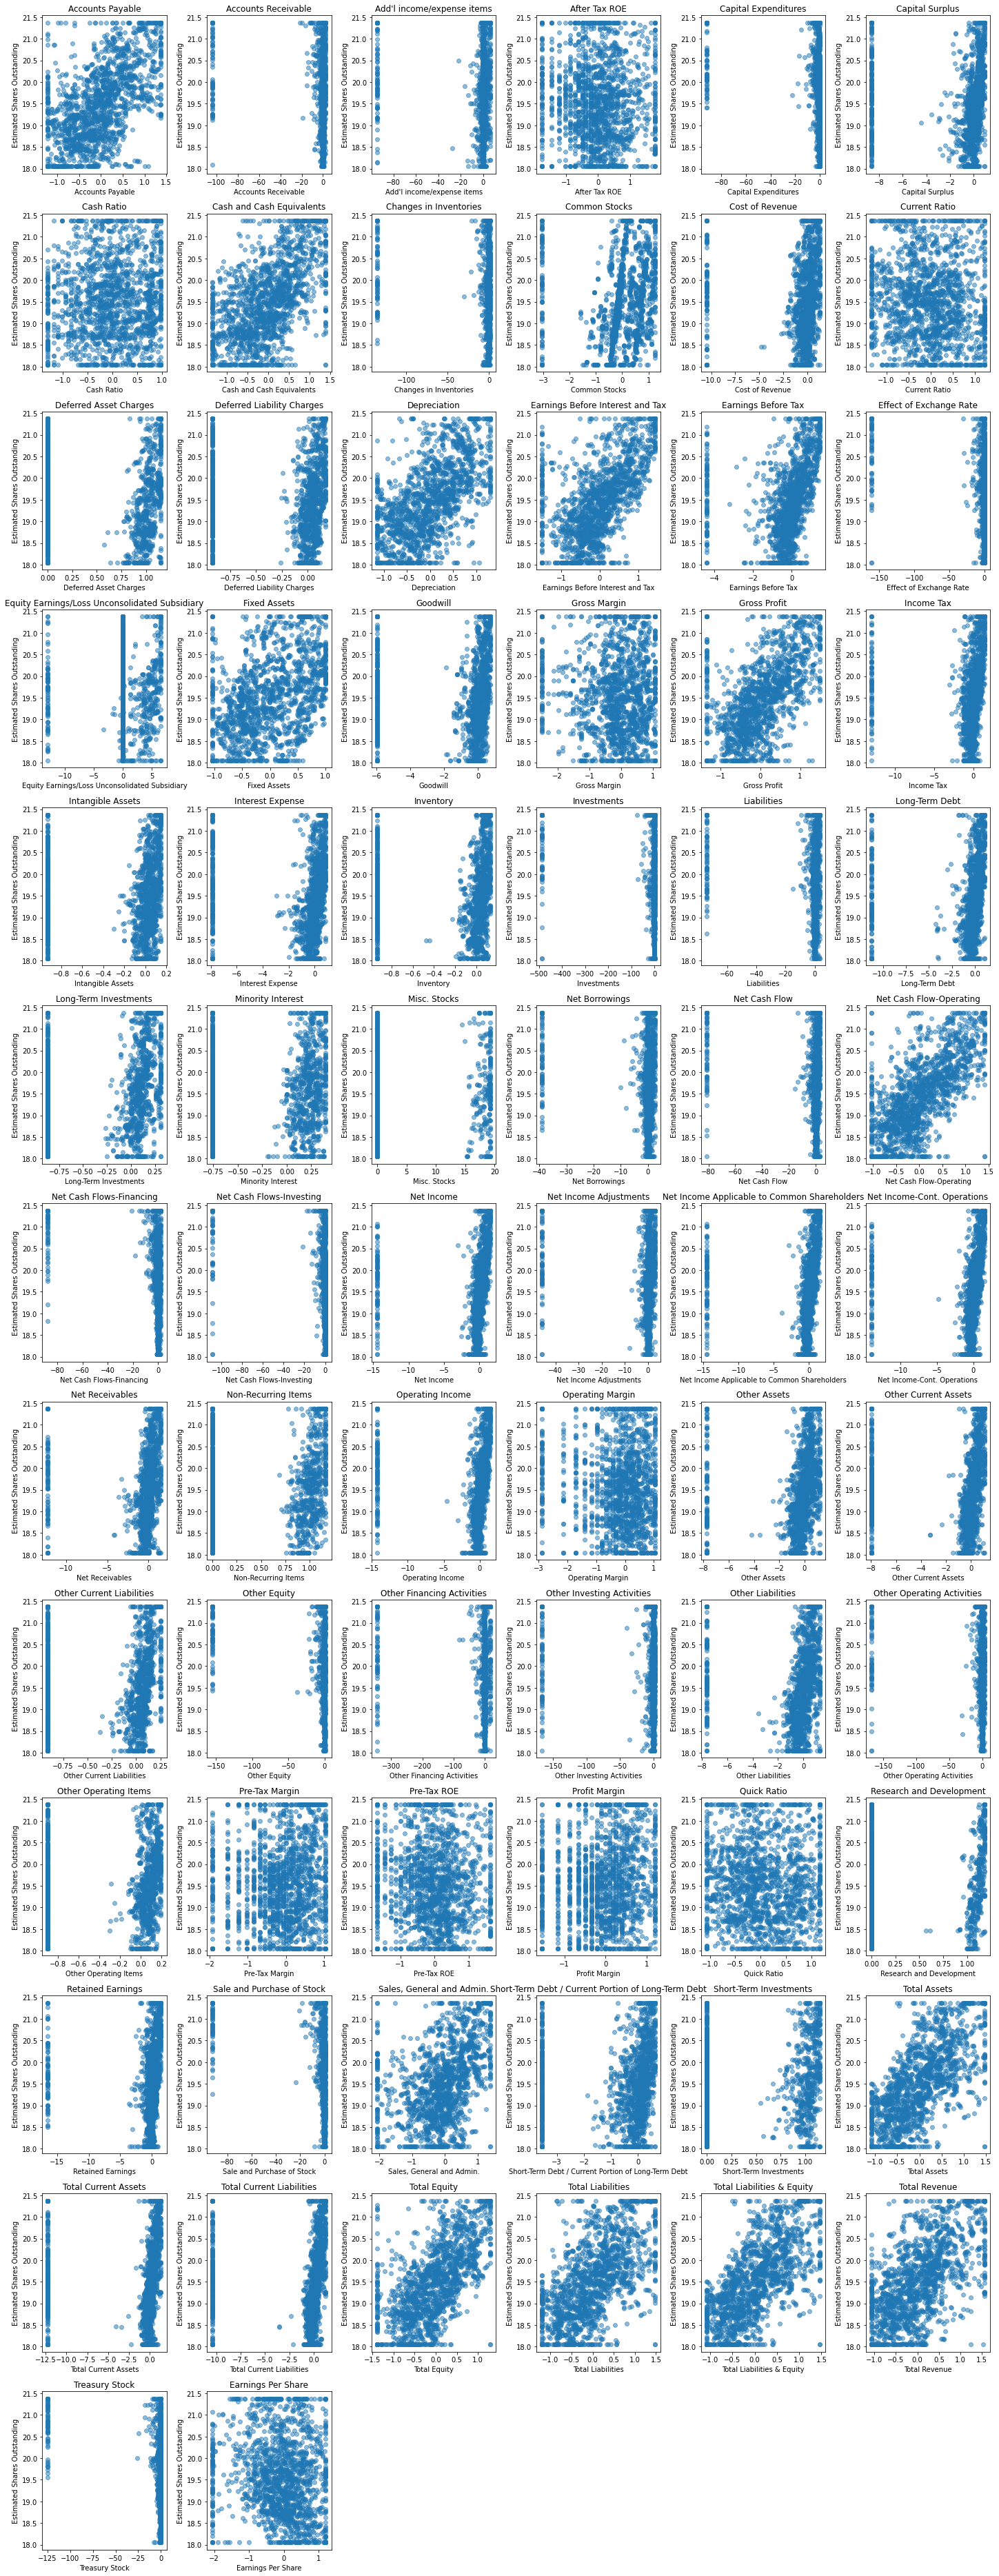

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_label_column' with the name of your label column
label_column = 'Estimated Shares Outstanding'

# List of columns to plot
plot_columns = preprocessed_df.columns.tolist()[:-29]

n_columns = len(plot_columns)
columns_per_row = 6
n_rows = int(np.ceil(n_columns / columns_per_row))

fig, axes = plt.subplots(n_rows, columns_per_row, figsize=(20, 4 * n_rows))

for idx, column_name in enumerate(plot_columns):
    row, col = divmod(idx, columns_per_row)

    axes[row, col].scatter(preprocessed_df[column_name], preprocessed_df[label_column], alpha=0.5)
    axes[row, col].set_title(column_name)
    axes[row, col].set_xlabel(column_name)
    axes[row, col].set_ylabel(label_column)

# Remove unused subplots
for idx in range(len(plot_columns), n_rows * columns_per_row):
    row, col = divmod(idx, columns_per_row)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

I have chosen the features for discretization based on the scatterplot, focusing on those where the data displays distinct groups or multiple clusters.

Below code defines a `select_columns` function that takes a list of columns in df as input. It iterates through the list, asking the user whether they want to select each column for discretization based on scatter plot in last step. If the user inputs 'y', the column is added to the selected_columns list, and it prints that the column is selected; otherwise, it prints that the column is not selected. After all columns are processed, the function returns the list of selected columns for discretization.

In [52]:
column_names = preprocessed_df.columns.tolist()[:-29]

# Function to select columns one by one
def select_columns(columns):
    selected_columns = []
    for column in columns:
        # You can replace 'input' with any other method to get user input
        user_input = input(f"Select {column}? (y/n): ")
        if user_input.lower() == 'y':
            selected_columns.append(column)
            print(f"{column} selected.")
        else:
            print(f"{column} not selected.")
    print("All columns processed.")
    return selected_columns

# Call the function with the list of column names
selected_columns = select_columns(column_names)
print("Selected columns:", selected_columns)



'\n\ncolumn_names = preprocessed_df.columns.tolist()[:-29]\n\n# Function to select columns one by one\ndef select_columns(columns):\n    selected_columns = []\n    for column in columns:\n        # You can replace \'input\' with any other method to get user input\n        user_input = input(f"Select {column}? (y/n): ")\n        if user_input.lower() == \'y\':\n            selected_columns.append(column)\n            print(f"{column} selected.")\n        else:\n            print(f"{column} not selected.")\n    print("All columns processed.")\n    return selected_columns\n\n# Call the function with the list of column names\nselected_columns = select_columns(column_names)\nprint("Selected columns:", selected_columns)\n\n'

In [ ]:
import pickle

# To save a selected_columns to a text file
with open('selected_columns.txt', 'wb') as f:
    pickle.dump(selected_columns, f)
    
# checking the length of list
len(selected_columns)



In [59]:
import pickle

# Reload the list again
with open('selected_columns.txt', 'rb') as f:
    selected_columns_discretization = pickle.load(f)

 # checking the length of list
len(selected_columns_discretization)

51

In [60]:
after_discretization_df_v2 = preprocessed_df.copy()

To determine the appropriate number of bins (k) for k-Means clustering, I have employed the elbow method. This involves selecting k based on the "elbow" point, where the decrease in the sum of squared errors (SSE) starts to level off.

Typically, discretization converts continuous numerical features into categorical features, after which one-hot encoding must be applied to the new categorical features. However, this can further increase the data's dimensionality. To avoid this issue, I have used the mean value of the X variable in scatterplot clusters as the bin name instead of using integer bins. This approach preserves the original numerical nature of the data while still achieving discretization. Consequently, one-hot encoding is not required, and the increase in dimensionality is avoided.


The below code performs k-Means clustering-based discretization on selected columns of a DataFrame and plots the results before and after discretization. It iterate through the selected columns in the DataFrame and apply the elbow method to each column. For each column, prompt the user to input the number of clusters to use for discretization. Based on output elbow method graph we need to select value of `k`. 


The `apply_kmeans_discretization()` function, which takes a DataFrame df, a column name column_name, and the number of clusters n_clusters. The function fits a k-Means model to the data, predicts the cluster labels, calculates the mean value for each cluster, and returns the discretized values.


The `plot_elbow_method()` function, which takes a DataFrame df and a column name column_name. This function plots the elbow method graph for the optimal number of clusters (k) for the given column.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Replace 'your_label_column' with the name of your label column
label_column = 'Estimated Shares Outstanding'

def apply_kmeans_discretization(df, column_name, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[[column_name]])
    cluster_labels = kmeans.predict(df[[column_name]])
    cluster_means = pd.DataFrame({column_name: df[column_name], 'cluster': cluster_labels}).groupby('cluster').mean().reset_index()
    discretized_values = cluster_means.loc[cluster_labels, column_name].values
    return discretized_values

def plot_elbow_method(df, column_name):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df[[column_name]])
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title(f'Elbow Method For Optimal k - {column_name}')
    plt.show()

In [ ]:

n_columns = len(selected_columns_discretization)
columns_per_row = 6
n_rows = int(np.ceil(n_columns / columns_per_row))

n_clusters_list = []

for idx in range(0, n_columns, columns_per_row):
    plot_columns = selected_columns_discretization[idx:idx+columns_per_row]

    for column_name in plot_columns:
        plot_elbow_method(after_discretization_df_v2, column_name)
        n_clusters = int(input(f"Enter the number of clusters for column '{column_name}': "))
        n_clusters_list.append(n_clusters)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Before discretization
        ax1.scatter(after_discretization_df_v2[column_name], after_discretization_df_v2[label_column], alpha=0.5)
        ax1.set_title('Before discretization')
        ax1.set_xlabel(column_name)
        ax1.set_ylabel(label_column)

        # Apply k-Means clustering-based discretization
        discretized_column = apply_kmeans_discretization(after_discretization_df_v2, column_name, n_clusters=n_clusters)
        after_discretization_df_v2[column_name] = discretized_column

        # After discretization
        ax2.scatter(after_discretization_df_v2[column_name], after_discretization_df_v2[label_column], alpha=0.5)
        ax2.set_title('After discretization')
        ax2.set_xlabel(column_name)
        ax2.set_ylabel(label_column)

        plt.show()

In [42]:
len(n_clusters_list)

51

In [43]:

import pickle

# To save a selected_columns to a text file
with open('n_clusters_list.txt', 'wb') as f:
    pickle.dump(n_clusters_list, f)
    
# checking the length of list
len(n_clusters_list)

51

In [61]:
import pickle

# Reload the list again
with open('n_clusters_list.txt', 'rb') as f:
    n_clusters_list = pickle.load(f)

 # checking the length of list
len(n_clusters_list)

51

In [62]:
column_cluster_dict = {column_name: n_clusters for column_name, n_clusters in zip(selected_columns_discretization, n_clusters_list)}

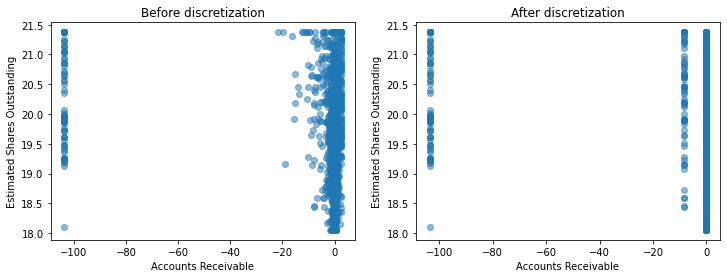

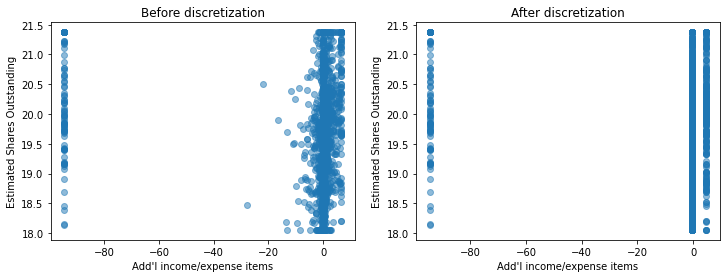

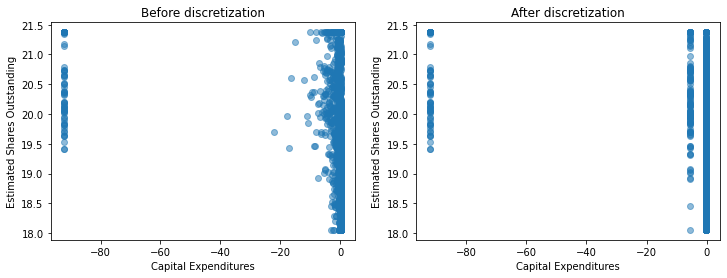

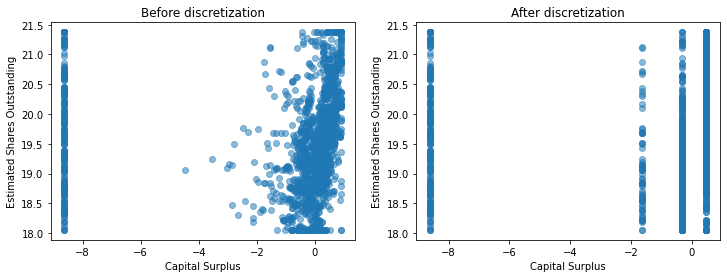

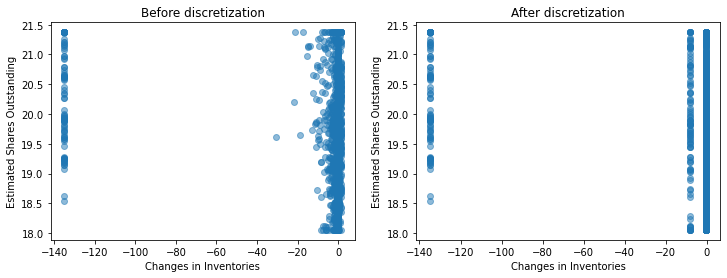

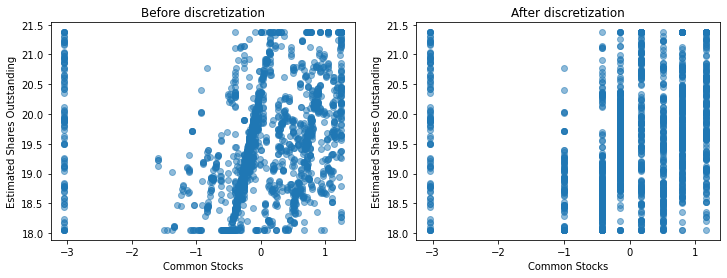

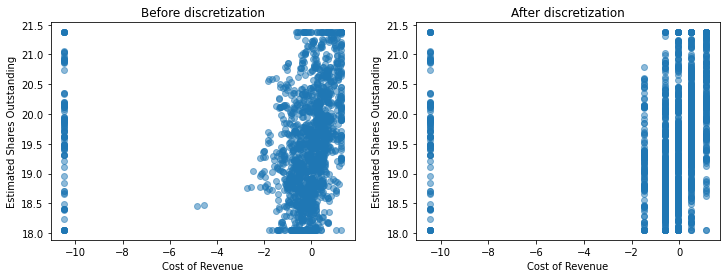

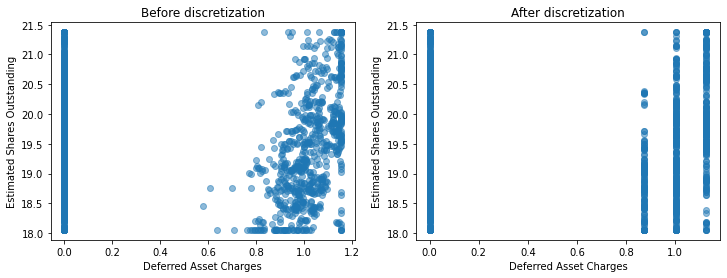

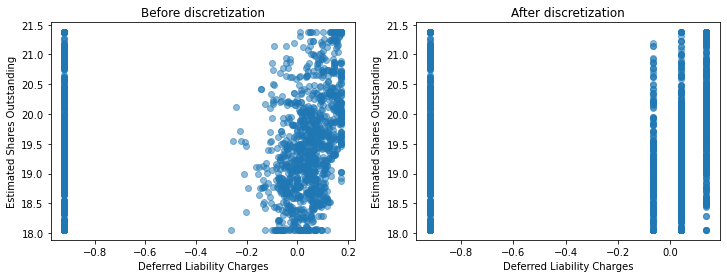

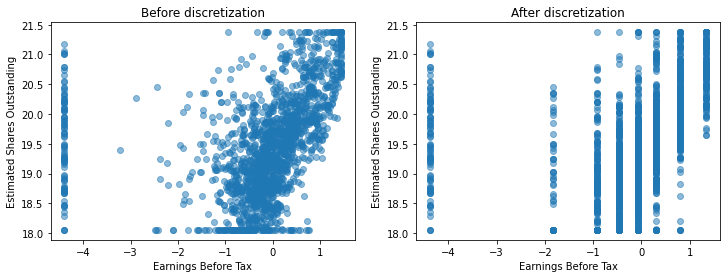

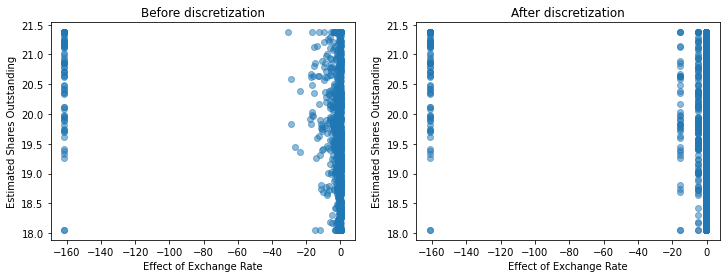

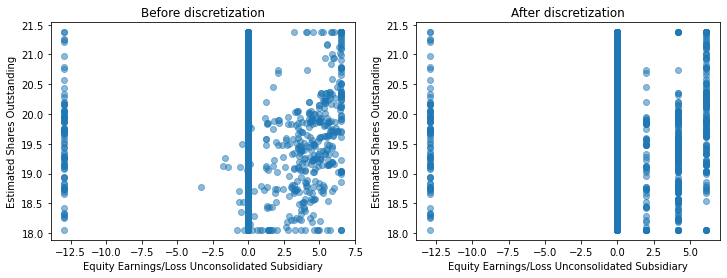

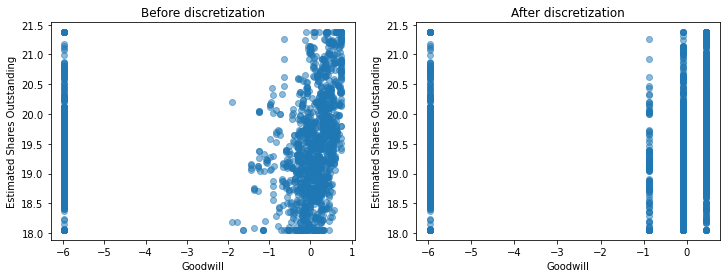

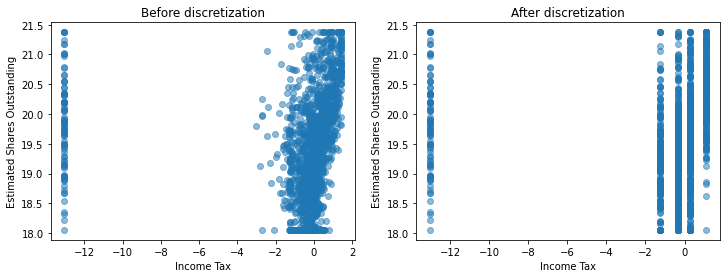

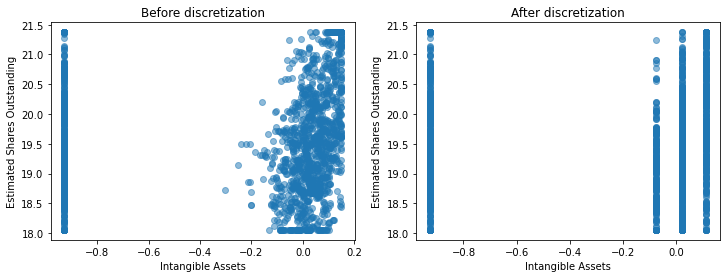

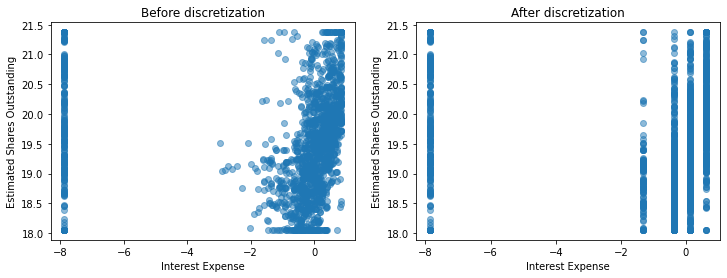

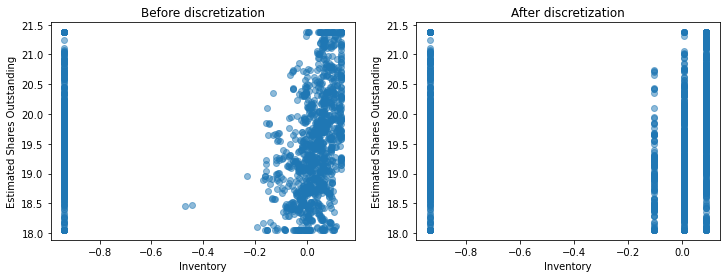

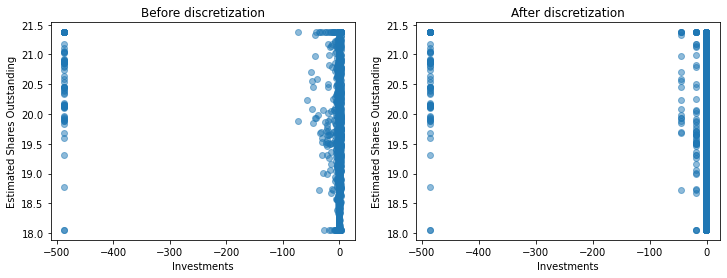

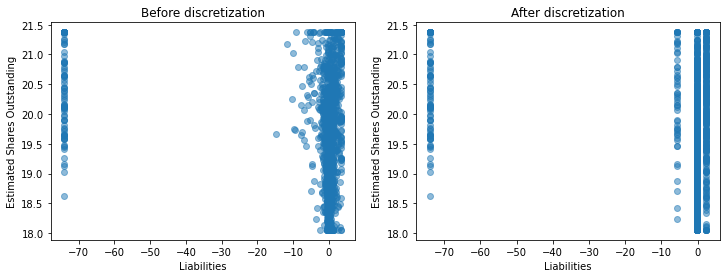

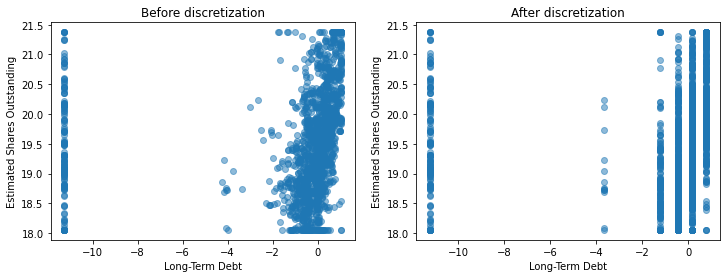

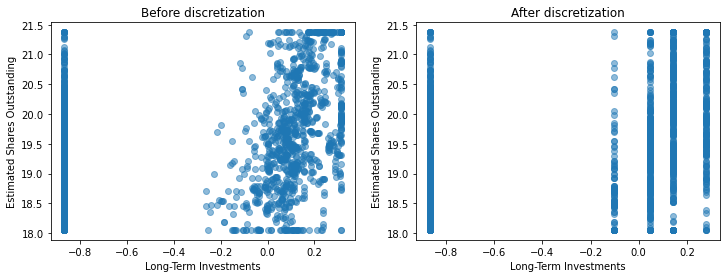

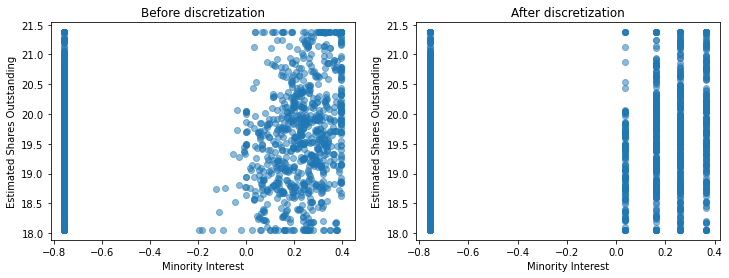

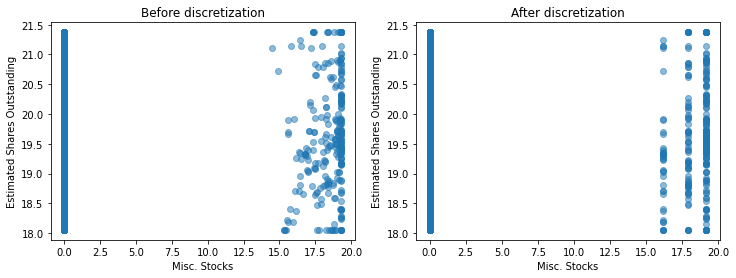

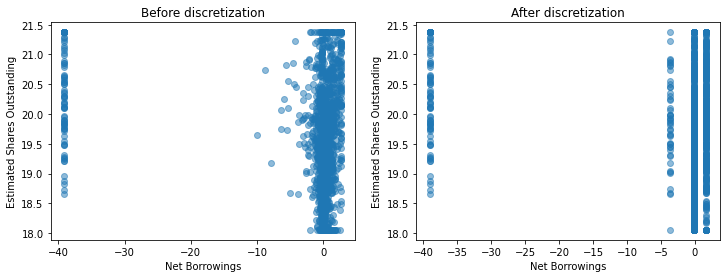

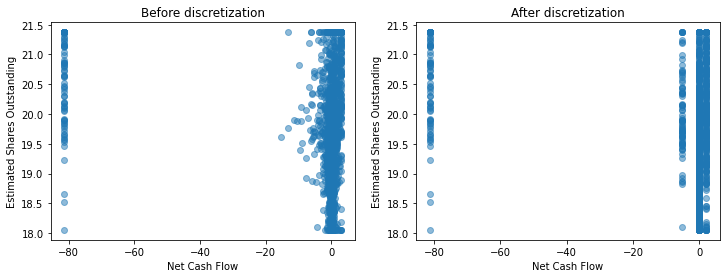

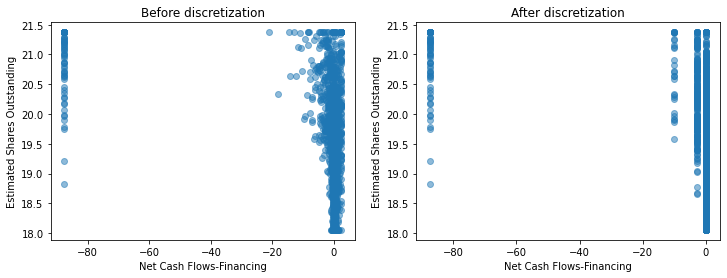

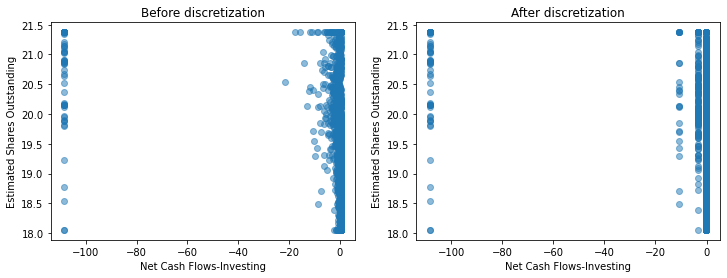

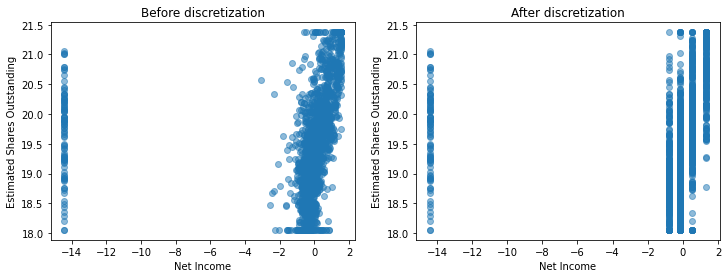

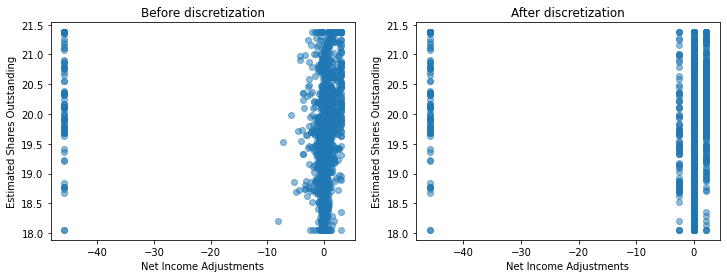

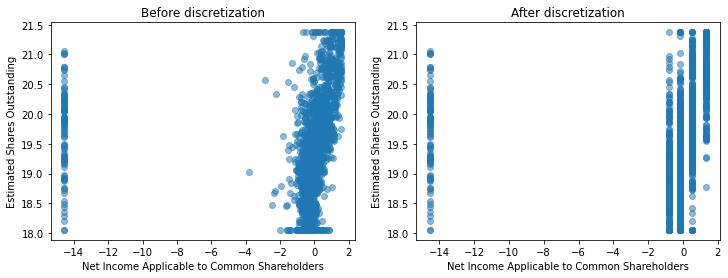

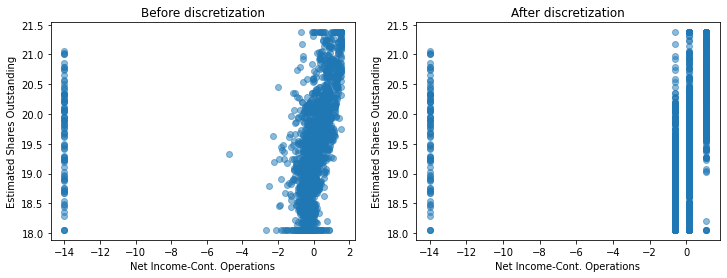

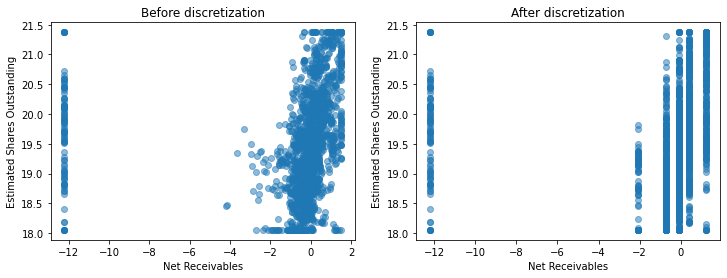

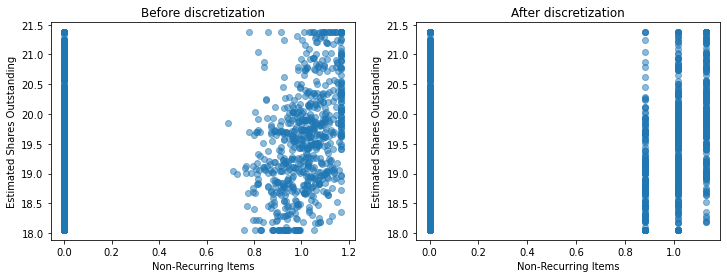

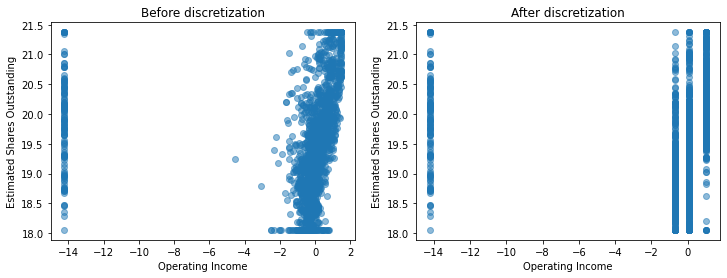

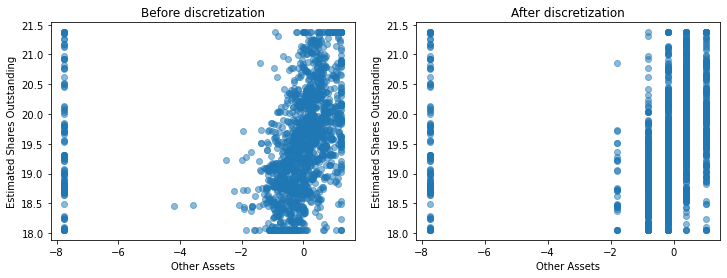

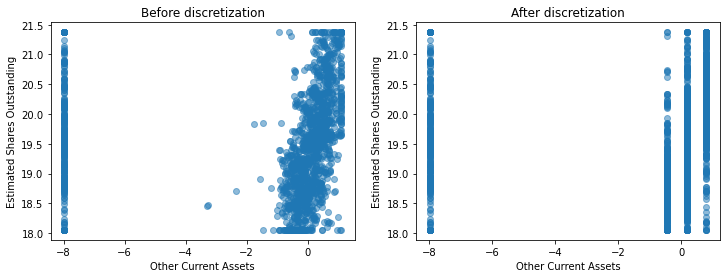

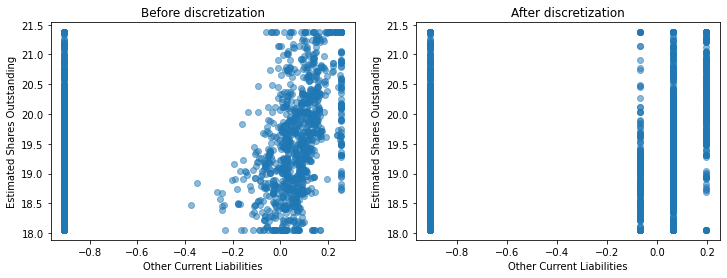

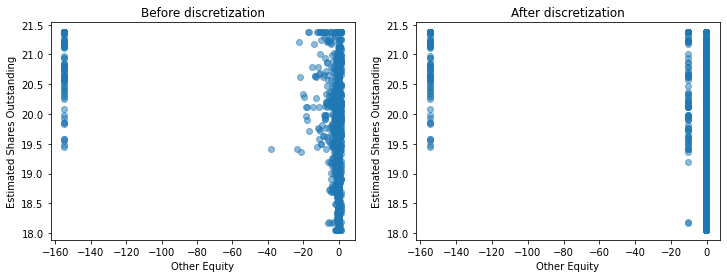

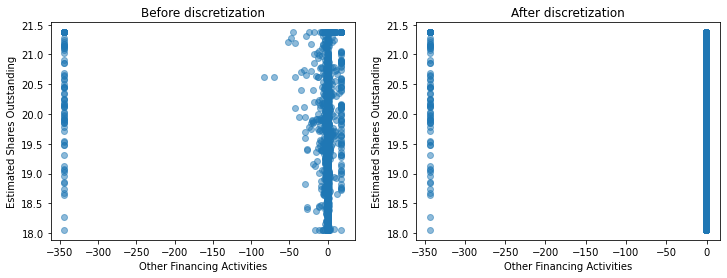

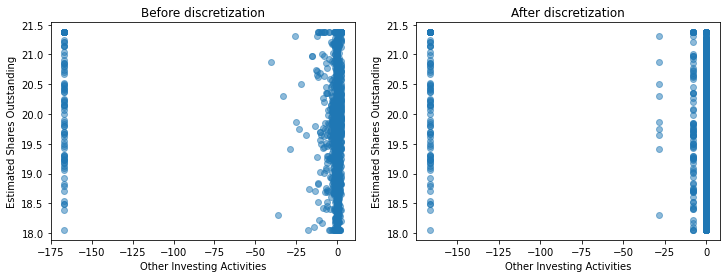

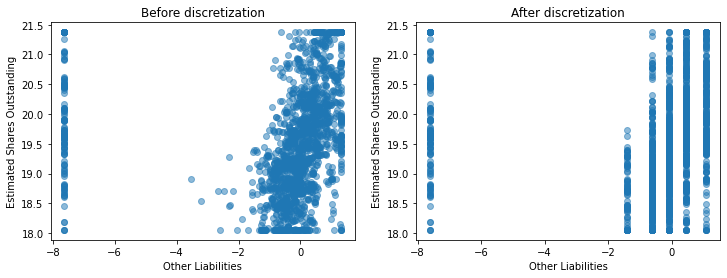

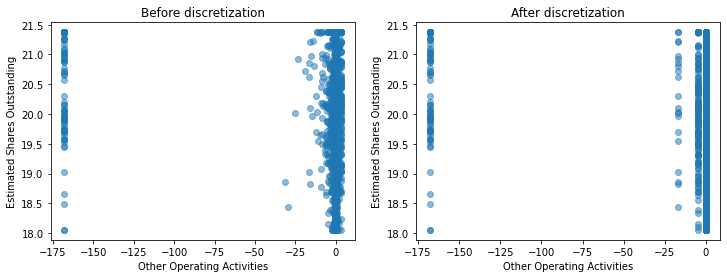

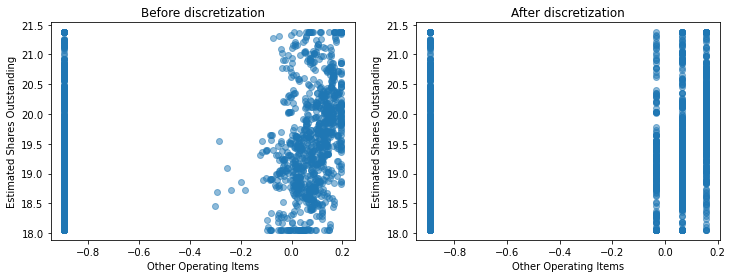

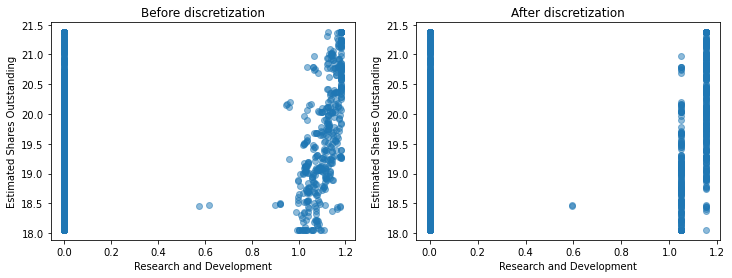

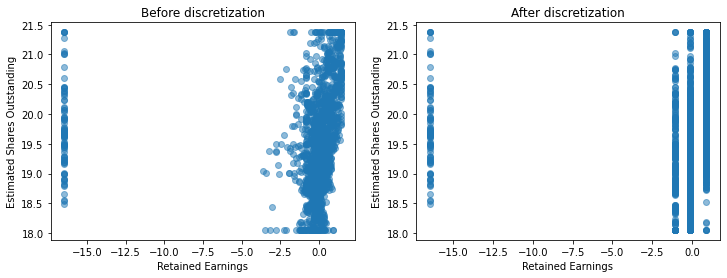

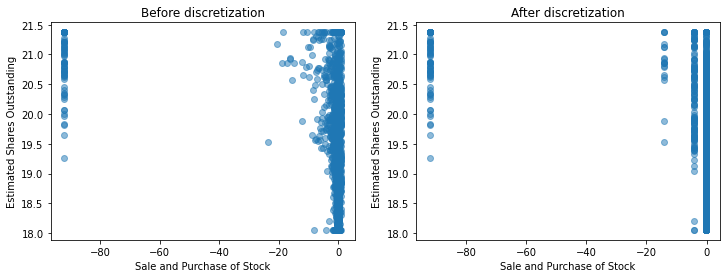

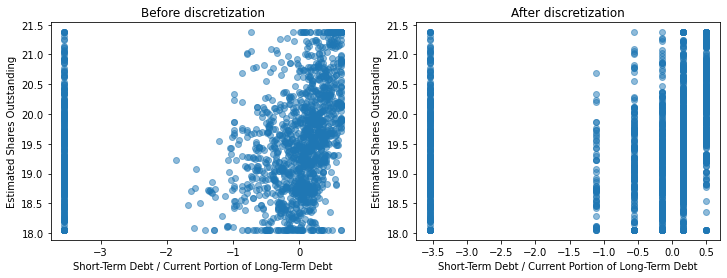

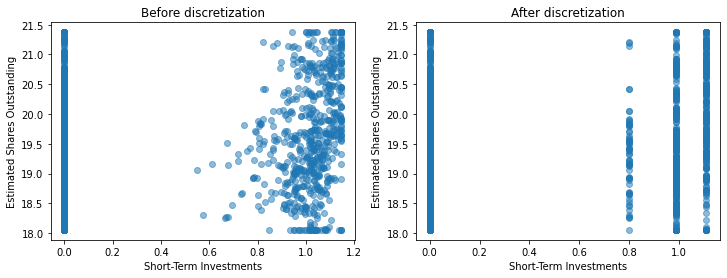

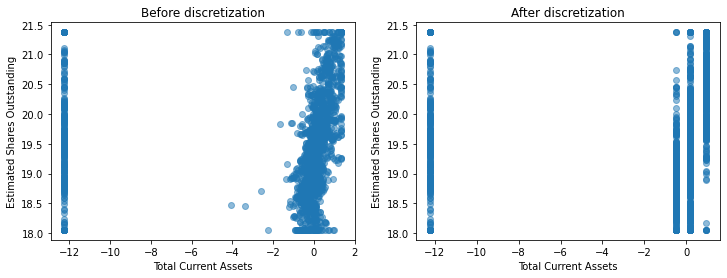

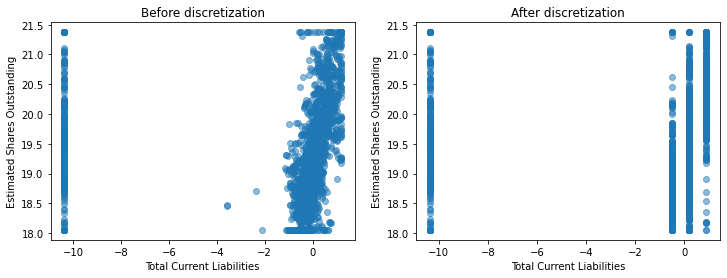

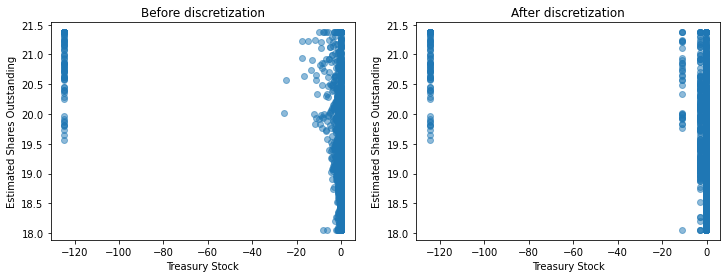

In [67]:
for column_name, n_clusters in column_cluster_dict.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Before discretization
    ax1.scatter(after_discretization_df_v2[column_name], after_discretization_df_v2[label_column], alpha=0.5)
    ax1.set_title('Before discretization')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel(label_column)

    # Apply k-Means clustering-based discretization
    discretized_column = apply_kmeans_discretization(after_discretization_df_v2, column_name, n_clusters=n_clusters)
    after_discretization_df_v2[column_name] = discretized_column

    # After discretization
    ax2.scatter(after_discretization_df_v2[column_name], after_discretization_df_v2[label_column], alpha=0.5)
    ax2.set_title('After discretization')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel(label_column)

    plt.show()

In [77]:
after_discretization_df_v2[after_discretization_df_v2.columns.tolist()[-32:]].head()

Total Revenue  Treasury Stock  Earnings Per Share  \
0       0.729832        -0.14982           -2.045613   
1       0.777088        -0.14982           -2.045613   
2       1.078358        -0.14982            0.327861   
3       1.052734        -0.14982            1.200366   
4      -0.165870        -0.14982            0.630998   

   Estimated Shares Outstanding  Period_Ending_Label  Period_Ending_2012  \
0                     19.629641                    0                   1   
1                     18.909397                    1                   0   
2                     20.390468                    2                   0   
3                     20.319993                    3                   0   
4                     18.109847                    0                   1   

   Period_Ending_2013  Period_Ending_2014  Period_Ending_2015  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   1                   0   
3                   0                   0                   1   
4                   0                   0                   0   

   Period_Ending_2016  ...  Ticker Symbol_embedding_11  \
0                   0  ...                    0.009250   
1                   0  ...                    0.009250   
2                   0  ...                    0.009250   
3                   0  ...                    0.009250   
4                   0  ...                   -0.010437   

   Ticker Symbol_embedding_12  Ticker Symbol_embedding_13  \
0                   -0.019489                   -0.034067   
1                   -0.019489                   -0.034067   
2                   -0.019489                   -0.034067   
3                   -0.019489                   -0.034067   
4                   -0.036733                    0.048471   

   Ticker Symbol_embedding_14  Ticker Symbol_embedding_15  \
0                   -0.033091                    0.042376   
1                   -0.033091                    0.042376   
2                   -0.033091                    0.042376   
3                   -0.033091                    0.042376   
4                    0.012759                    0.007744   

   Ticker Symbol_embedding_16  Ticker Symbol_embedding_17  \
0                    0.014252                    0.020857   
1                    0.014252                    0.020857   
2                    0.014252                    0.020857   
3                    0.014252                    0.020857   
4                    0.013270                    0.015422   

   Ticker Symbol_embedding_18  Ticker Symbol_embedding_19  \
0                   -0.021468                   -0.015593   
1                   -0.021468                   -0.015593   
2                   -0.021468                   -0.015593   
3                   -0.021468                   -0.015593   
4                   -0.000138                   -0.028663   

   Ticker Symbol_embedding_20  
0                    0.046576  
1                    0.046576  
2                    0.046576  
3                    0.046576  
4                    0.030709  

[5 rows x 32 columns]

In [78]:
# drop `Period_Ending_Label`, `Ticker Symbol_encoded` label encoded columns
preprocessed_final = after_discretization_df_v2.drop(['Period_Ending_Label', 'Ticker Symbol_encoded'], axis=1)

In [82]:
preprocessed_final[preprocessed_final.columns.tolist()[-26:]].head()

Period_Ending_2012  Period_Ending_2013  Period_Ending_2014  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   0                   1   
3                   0                   0                   0   
4                   1                   0                   0   

   Period_Ending_2015  Period_Ending_2016  Ticker Symbol_embedding_0  \
0                   0                   0                   0.042434   
1                   0                   0                   0.042434   
2                   0                   0                   0.042434   
3                   1                   0                   0.042434   
4                   0                   0                   0.031420   

   Ticker Symbol_embedding_1  Ticker Symbol_embedding_2  \
0                   0.024977                   0.046281   
1                   0.024977                   0.046281   
2                   0.024977                   0.046281   
3                   0.024977                   0.046281   
4                  -0.006531                   0.014514   

   Ticker Symbol_embedding_3  Ticker Symbol_embedding_4  ...  \
0                   0.023232                   0.020921  ...   
1                   0.023232                   0.020921  ...   
2                   0.023232                   0.020921  ...   
3                   0.023232                   0.020921  ...   
4                  -0.034825                  -0.000060  ...   

   Ticker Symbol_embedding_11  Ticker Symbol_embedding_12  \
0                    0.009250                   -0.019489   
1                    0.009250                   -0.019489   
2                    0.009250                   -0.019489   
3                    0.009250                   -0.019489   
4                   -0.010437                   -0.036733   

   Ticker Symbol_embedding_13  Ticker Symbol_embedding_14  \
0                   -0.034067                   -0.033091   
1                   -0.034067                   -0.033091   
2                   -0.034067                   -0.033091   
3                   -0.034067                   -0.033091   
4                    0.048471                    0.012759   

   Ticker Symbol_embedding_15  Ticker Symbol_embedding_16  \
0                    0.042376                    0.014252   
1                    0.042376                    0.014252   
2                    0.042376                    0.014252   
3                    0.042376                    0.014252   
4                    0.007744                    0.013270   

   Ticker Symbol_embedding_17  Ticker Symbol_embedding_18  \
0                    0.020857                   -0.021468   
1                    0.020857                   -0.021468   
2                    0.020857                   -0.021468   
3                    0.020857                   -0.021468   
4                    0.015422                   -0.000138   

   Ticker Symbol_embedding_19  Ticker Symbol_embedding_20  
0                   -0.015593                    0.046576  
1                   -0.015593                    0.046576  
2                   -0.015593                    0.046576  
3                   -0.015593                    0.046576  
4                   -0.028663                    0.030709  

[5 rows x 26 columns]

In [83]:
preprocessed_final.to_csv('preprocessed_final.csv', index=False)

# b) I)  Feature Engineering with PCA

In below code, I have created a PCA instance and fit it to the feature matrix X. Then, I have transform the data using the fit_transform method, which applies dimensionality reduction on the original features. `explained_variance_ratios` contains the amount of variance explained by each principal component. `cumulative_explained_variance` is the cumulative sum of the explained variance ratios, showing the total amount of variance explained up to each component.

In [180]:
preprocessed_final.to_csv('preprocessed_final.csv', index=False)

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Separate the feature columns and target column
X = preprocessed_final.drop('Estimated Shares Outstanding', axis=1)
y = preprocessed_final['Estimated Shares Outstanding']

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Determine the explained variance ratio and cumulative explained variance
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

print("Explained variance ratio of first 20 principal components\n")
print(explained_variance_ratios[0:20])
      
print("\n\n\nCumulative explained variance of first 20 principal components\n")
print(cumulative_explained_variance[0:20])

Explained variance ratio of first 20 principal components

[0.43676265 0.20392787 0.0833265  0.0488727  0.04380394 0.03257889
 0.02674485 0.02163899 0.01875306 0.01561609 0.01359174 0.01061047
 0.01017175 0.00767776 0.00718102 0.0048174  0.00352306 0.00215934
 0.00175237 0.00136054]



Cumulative explained variance of first 20 principal components

[0.43676265 0.64069052 0.72401703 0.77288973 0.81669367 0.84927256
 0.87601741 0.8976564  0.91640947 0.93202555 0.94561729 0.95622776
 0.96639951 0.97407727 0.98125829 0.98607569 0.98959875 0.99175809
 0.99351046 0.994871  ]


# b) II)   Identify significant and independent features

Next I have created a scree plot that shows the explained variance ratio and cumulative explained variance for each principal component. This plot helps in visualizing how much variance is explained by each component and assists in selecting the optimal number of components to retain.


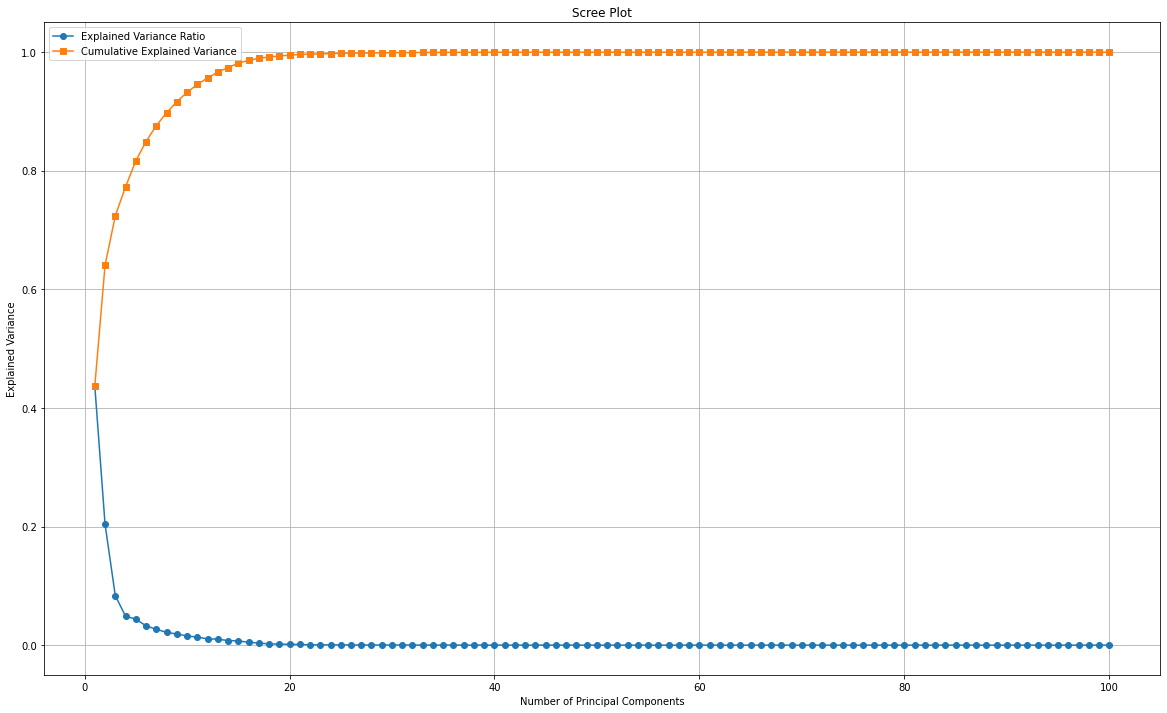

In [182]:
# Scree plot
plt.figure(figsize=(20, 12))
plt.plot(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, 'o-', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 's-', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

After that I have set an explained variance threshold `0.95` and loop through the cumulative explained variance array to find the minimum number of components needed to achieve this threshold. The value of `n_components` indicates the number of principal components to keep.


Finally I have created a new PCA instance with the selected number of components and fit and transform the original features. `X_pca` contains the reduced feature set with the chosen number of principal components.

In [183]:
# Selecting the number of components
n_components = 0
explained_variance_threshold = 0.95  # Change this to the desired threshold

for idx, cum_explained_variance in enumerate(cumulative_explained_variance):
    if cum_explained_variance > explained_variance_threshold:
        n_components = idx + 1
        break

print(f"Number of principal components to keep: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

Number of principal components to keep: 12


In [184]:
type(y)

pandas.core.series.Series

In [185]:
type(X_pca)

numpy.ndarray

In [186]:
y_copy = y
y = y.to_numpy()

In [187]:
print(X_pca.shape)
print(y.shape)

(1781, 12)
(1781,)


In [188]:
print(X_pca[0:4])

[[ -32.23393996  -11.48387664   -7.7730509    -4.9565074    -1.72338457
    -2.20553395  -15.42166962    8.16743598   -4.6087287    88.59243431
   -14.72431205   -4.48713614]
 [ -32.6197834   -11.86201809  -12.57323425   -2.28405834    1.29714325
    -1.81338954  -12.48211586   15.6613057    -2.28306397   87.77315159
   -17.20753181   -6.64574658]
 [ -21.27820969   -2.97951503   78.90657001  -36.04258482  -34.78908379
     6.21694678  -52.56730058 -104.86523914   83.03092375   14.40928303
   -11.86148287  -21.4338632 ]
 [ -20.07418271    3.23981446   99.38807341  -33.23436713  -38.07877341
    20.65399093  -82.48953431  -57.59896111   75.01659889   92.97032245
   -23.25158026   13.66365427]]


In [189]:
print(y[0:4])

[19.62964109 18.90939708 20.39046843 20.31999323]


# c) I) Linear Regression with Cross Validation


- Below code first define `mean_absolute_percentage_error` custom function for MAPE (Mean Absolute Percentage Error). I am using MAPE a performance evualation matric.
- Then splits the data into training and test sets, then applies linear regression with 10-fold cross-validation on the training set. 
- After that, it fits the model on the training set and makes predictions on the test set. 
- Finally, it applies the inverse log transformation to the true labels and predictions and calculates the mean absolute percentage error (MAPE).

In [190]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Define custom function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Apply linear regression with 10-fold cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
linear_regression = LinearRegression()
cross_val_scores = cross_val_score(linear_regression, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')

# Print the average MSE across the 10 folds
print(f"Average MSE: {-np.mean(cross_val_scores)}")

# Fit the model on the training set and make predictions on the test set
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

# Inverse log transform the true labels (y_test) and predictions (y_pred)
y_test_inverse = np.exp(y_test) 
y_pred_inverse_linear = np.exp(y_pred) 

# Calculate the mean absolute percentage error (MAPE)
mape_linear = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse_linear)
print(f"MAPE: {mape_linear}")

Average MSE: 0.5182850284957583
MAPE: 74.32684811824764


This linear regression model's average MSE on the log-transformed scale is 0.5183, which means the model's errors are squared and averaged, resulting in a relatively small value. However, when you calculate the MAPE after applying the inverse transformations, you get a value of 74.33%, which is considerably larger. This discrepancy can be attributed to the differences between the two evaluation metrics.


MSE measures the average squared difference between the predicted and true values, which means it penalizes large errors more severely. When using log-transformed data, the relationship between the target and features is assumed to be linear in the log space. The resulting model is more robust to outliers and extreme values. However, the downside of using log-transformed data is that it can be challenging to interpret the performance directly.


On the other hand, MAPE calculates the average percentage error between the predicted and true values, which makes it a more interpretable metric. The high MAPE value of 74.33% indicates that, on average, the model's predictions deviate from the true values by 74.33%. 

In [191]:
y_test[0:10]

array([20.81355316, 19.05144923, 18.7356695 , 19.3350149 , 19.47962778,
       19.59004626, 20.92050649, 19.44697237, 19.2158952 , 20.73240716])

In [192]:
y_pred[0:10]

array([21.30262069, 19.26416958, 19.27524901, 19.3115466 , 19.26524262,
       19.26731937, 19.82566592, 19.29081109, 19.2674489 , 19.912885  ])

In [193]:
y_test_inverse[0:10]

array([1.09448871e+09, 1.87905405e+08, 1.37024390e+08, 2.49511333e+08,
       2.88333333e+08, 3.21994898e+08, 1.21803714e+09, 2.79069767e+08,
       2.21491594e+08, 1.00918323e+09])

In [194]:
y_pred_inverse[0:10]

array([1.74832980e+09, 2.33605053e+08, 2.36312033e+08, 2.44351946e+08,
       2.33831483e+08, 2.34316899e+08, 4.10854474e+08, 2.39966299e+08,
       2.34346042e+08, 4.53383196e+08])

# c) II) Lasso Regression with Cross Validation

Below code uses the LassoCV class from scikit-learn, which performs Lasso Regression with built-in cross-validation. The model will find the best regularization parameter (alpha) automatically during the training process and visualizes the process of finding the best regularization parameter (alpha). Alpha determines the strength of the penalty applied to the regression coefficients: The best regularization parameter (alpha) is the one that results in the optimal balance between fitting the training data and avoiding overfitting.

MSE: 0.5525269551639577
MAPE: 74.30442627010476
Best alpha: 0.035656363656691684


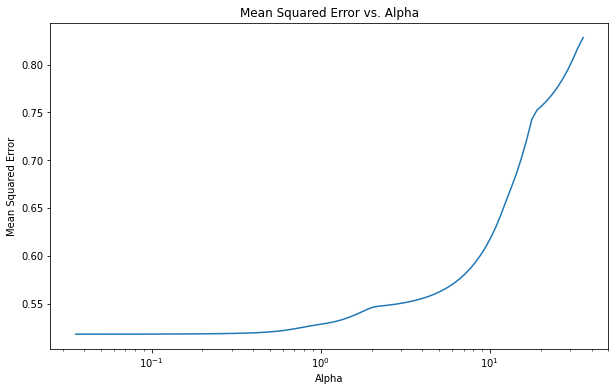

In [196]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Apply Lasso regression with 10-fold cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
lasso_regression = LassoCV(cv=k_fold, random_state=42)
lasso_regression.fit(X_train, y_train)

# Get the prediction for the test dataset
y_pred = lasso_regression.predict(X_test)

# Inverse log transform the true labels (y_test) and predictions (y_pred)
y_pred_inverse_lasso  = np.exp(y_pred) 

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Calculate the mean absolute percentage error (MAPE)
mape_lasso = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse_lasso)
print(f"MAPE: {mape_lasso}")

# Print the best alpha value
best_alpha = lasso_regression.alpha_
print(f"Best alpha: {best_alpha}")

# Visualize the process of finding the best regularization parameter (alpha)
alphas = lasso_regression.alphas_
mse_path = lasso_regression.mse_path_

mean_mse_path = mse_path.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mean_mse_path)
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs. Alpha")
plt.show()

# c) III) Ridge Regression with Cross Validation

MSE: 0.5510735973916564
MAPE: 74.29682341408022
Best alpha: 61359.072734131885


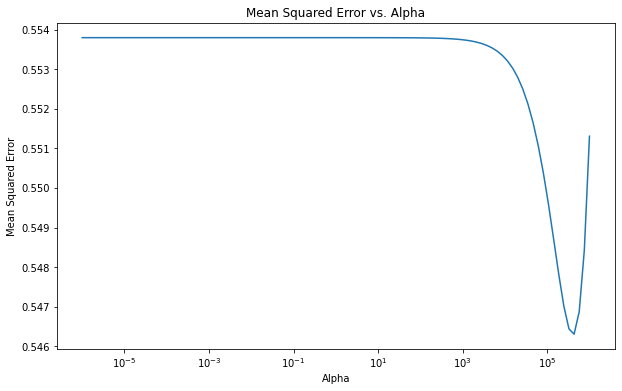

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Apply Ridge regression with 10-fold cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
alphas = np.logspace(-6, 6, 100)
ridge_regression = RidgeCV(cv=k_fold, alphas=alphas)
ridge_regression.fit(X_train, y_train)

# Get the prediction for the test dataset
y_pred = ridge_regression.predict(X_test)

# Inverse log transform the true labels (y_test) and predictions (y_pred)
y_pred_inverse_ridge = np.exp(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Calculate the mean absolute percentage error (MAPE)
mape_ridge = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse_ridge)
print(f"MAPE: {mape_ridge}")

# Print the best alpha value
best_alpha = ridge_regression.alpha_
print(f"Best alpha: {best_alpha}")

# Visualize the process of finding the best regularization parameter (alpha)
mse_values = []

for alpha in alphas:
    ridge = RidgeCV(cv=k_fold, alphas=[alpha])
    ridge.fit(X_train, y_train)
    y_pred_temp = ridge.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mse_values)
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs. Alpha")
plt.show()


## Visualize the coefficients of Linear, Lasso, and Ridge regression models

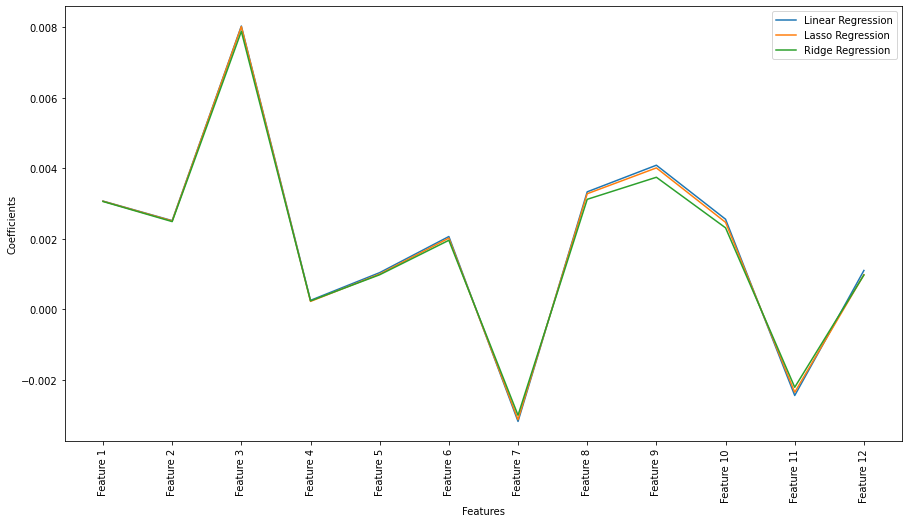

In [161]:
import matplotlib.pyplot as plt

def get_coefficients(regression_model):
    return regression_model.coef_

def plot_coefficients(models, model_names, feature_names):
    plt.figure(figsize=(15, 8))
    
    for model, name in zip(models, model_names):
        coefficients = get_coefficients(model)
        plt.plot(coefficients, label=name)
    
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Coefficients")
    plt.legend()
    plt.show()

# Assuming you have already fitted linear_regression, lasso_regression, and ridge_regression models
models = [linear_regression, lasso_regression, ridge_regression]
model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression"]

# Assuming feature_names is a list of feature names corresponding to the columns in X_pca
feature_names = ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5", "Feature 6", "Feature 7", "Feature 8", "Feature 9", "Feature 10", "Feature 11", "Feature 12"]

plot_coefficients(models, model_names, feature_names)


## Compare the predicted values of Linear, Lasso, and Ridge regression with actual values

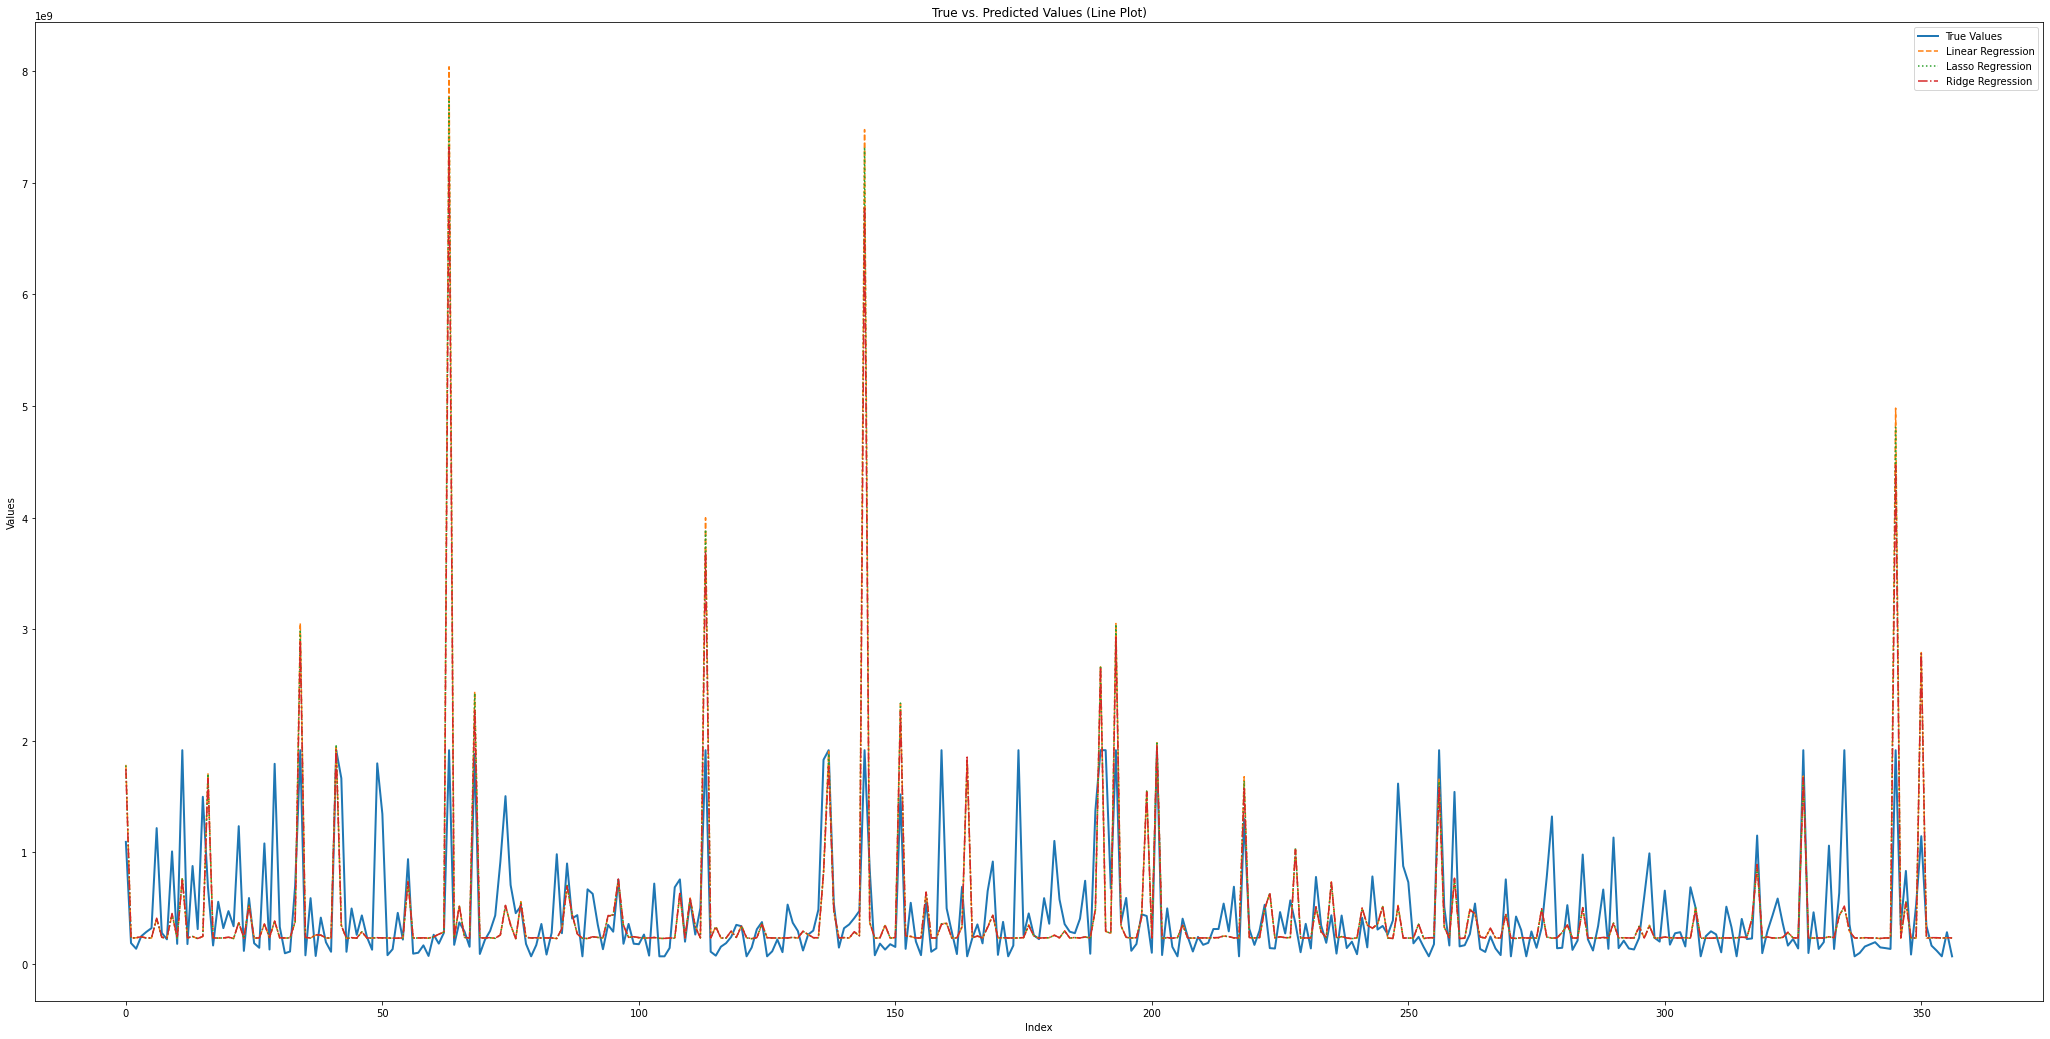

In [167]:
plt.figure(figsize=(36, 18))
plt.plot(y_test_inverse, label="True Values", linewidth=2)
plt.plot(y_pred_inverse_linear, label="Linear Regression", linestyle="--")
plt.plot(y_pred_inverse_lasso, label="Lasso Regression", linestyle=":")
plt.plot(y_pred_inverse_ridge, label="Ridge Regression", linestyle="-.")

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("True vs. Predicted Values (Line Plot)")
plt.legend()
plt.show()


Since the dataset seems to be noisy and has non-linear relationships, we might want to try other regression models, such as support vector regression (SVR), random forest regression, or gradient boosting regression. These models might be better suited for handling complex relationships in the data.

# (d) Model evaluation and compare different regression models

I have selected the XGBoost model for this part of the analysis to compare it with Linear, Lasso, and Ridge regression models. XGBoost is a sophisticated and flexible model that can effectively tackle complex relationships, missing values, and outliers in the dataset. Additionally, it offers regularization, feature importance analysis, and efficient training, making it a perfect choice for this case.

Furthermore, I have not implemented any data preprocessing that I previously performed for Linear, Lasso, and Ridge regression models. XGBoost is adept at addressing all the challenges in the dataset without requiring additional support. This enables a faster model-building process, showcasing XGBoost's inherent strengths in handling a wide range of data issues.

In [168]:
# Reading dataset
original_df = pd.read_csv("fundamentals.csv", index_col=[0])

MSE: 1.3268756202590171e+17
MAPE: 20.667571925205543


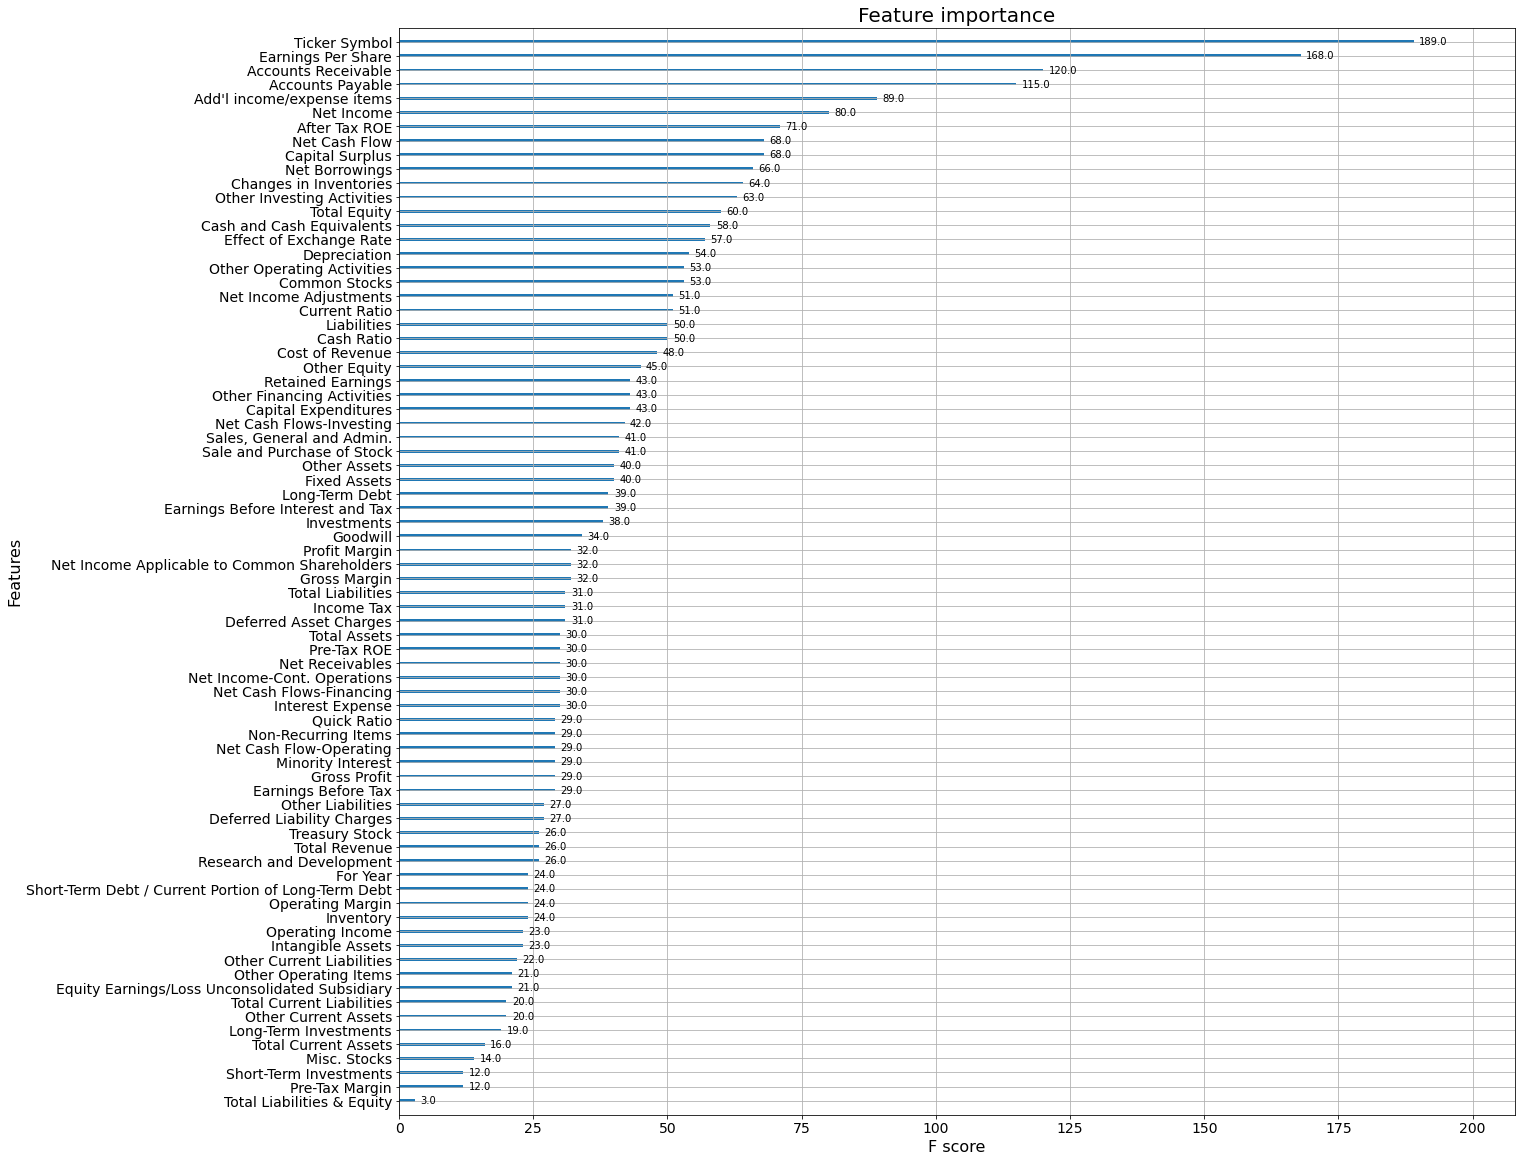

In [209]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Label encode 'Ticker Symbol' column
le = LabelEncoder()
original_df['Ticker Symbol'] = le.fit_transform(original_df['Ticker Symbol'])

# Extract the year from the 'Period Ending' column and change its datatype to int
original_df['Period Ending'] = pd.to_datetime(original_df['Period Ending']).dt.year.astype(int)

# Remove rows with missing values in column `Estimated Shares Outstanding`
original_df = original_df.dropna(subset=['Estimated Shares Outstanding'])

# Define features and target
X = original_df.drop('Estimated Shares Outstanding', axis=1)
y = original_df['Estimated Shares Outstanding']

# Training, validation, and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGboost regression model to predict the target column `Estimated Shares Outstanding`
model = xgb.XGBRegressor(max_depth=5,n_estimators=150)
model.fit(X_train, y_train)

# Get the prediction for the test dataset
y_pred = model.predict(X_test)

# Print the MSE and calculate MPAE
mse_xgb = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_xgb}")

mape_xgb = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape_xgb}")

# Visualize the model training process
xgb.plot_importance(model)
plt.show()


## Compare the predicted values of xgb regression with actual values

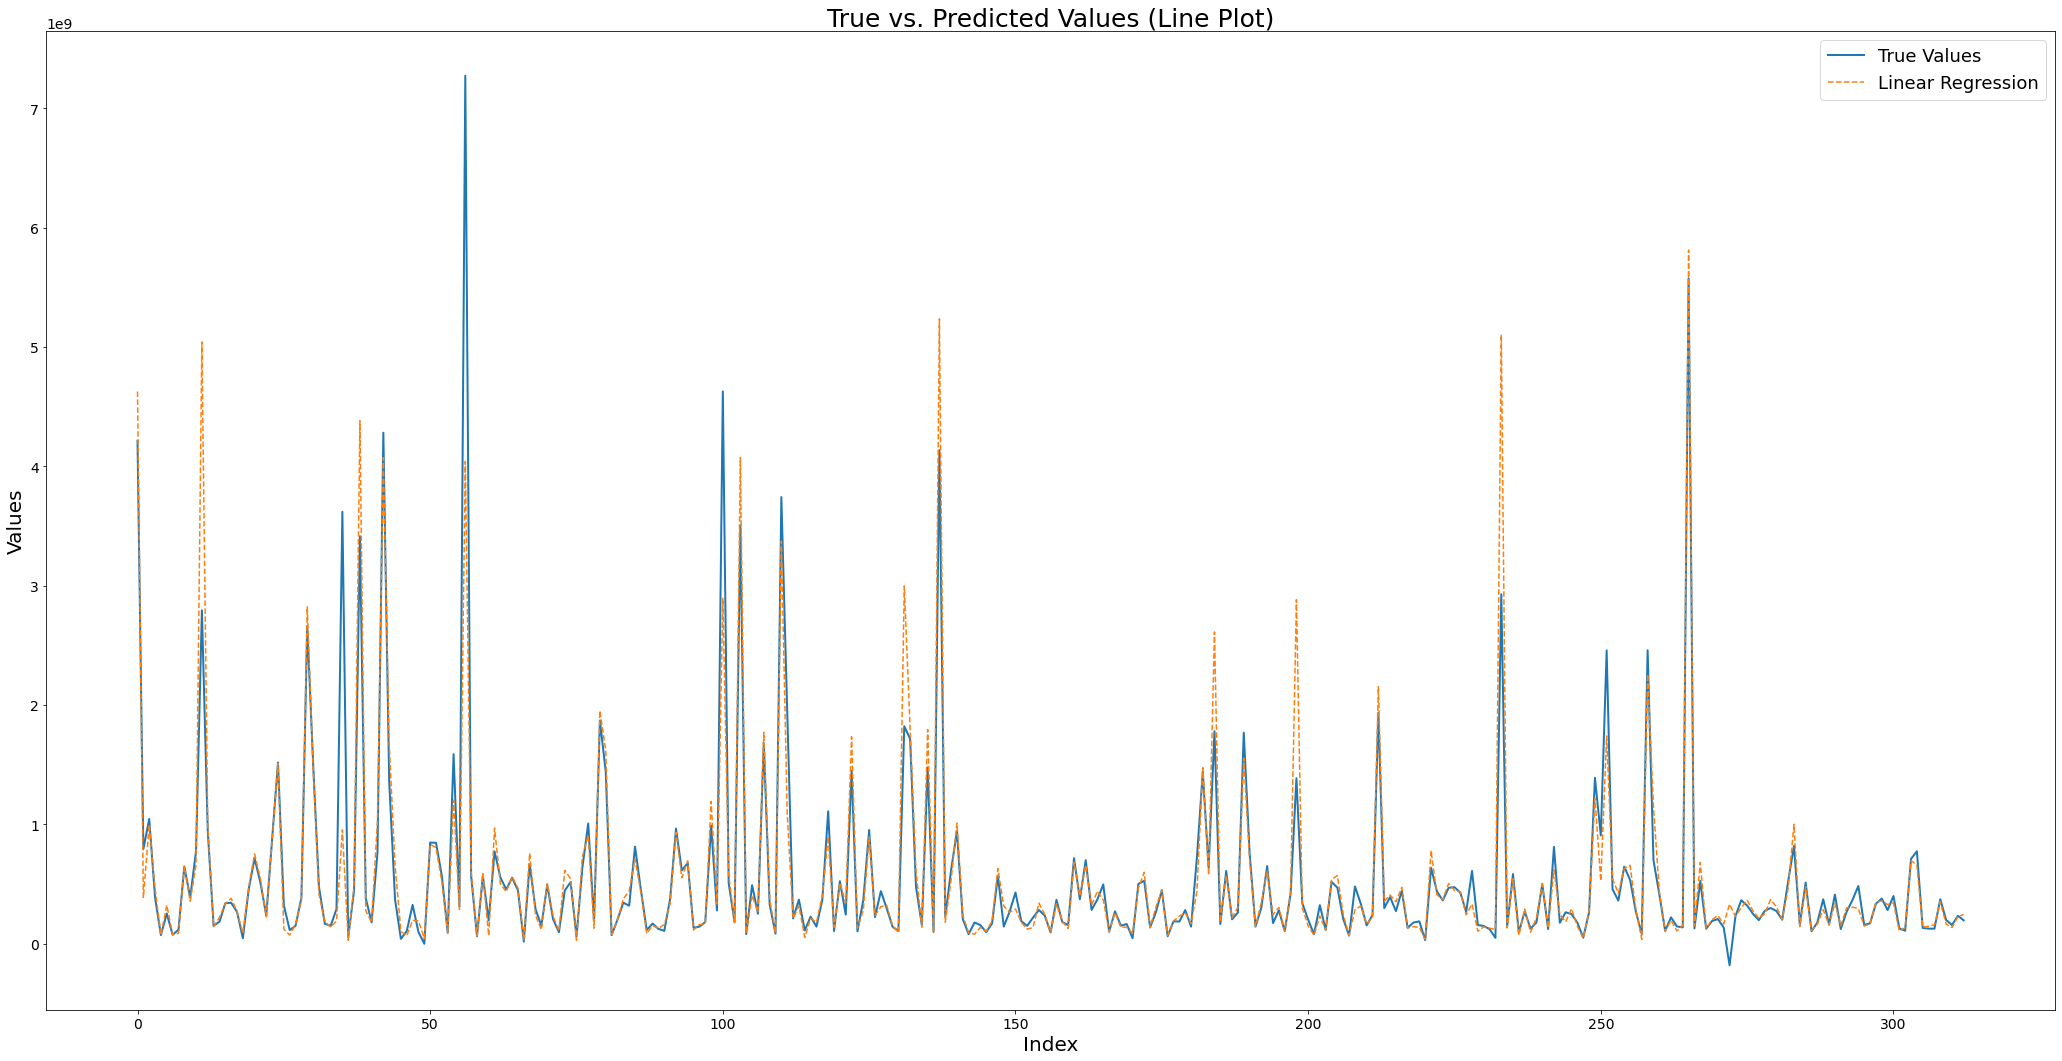

In [221]:
plt.figure(figsize=(36, 18))

plt.plot(y_pred, label="True Values", linewidth=2)
plt.plot(y_test.to_numpy(), label="Linear Regression", linestyle="--")

plt.xlabel("Index", fontsize=20)
plt.ylabel("Values", fontsize=20)
plt.title("True vs. Predicted Values (Line Plot)",fontsize=25)
plt.legend(fontsize=18)
plt.show()


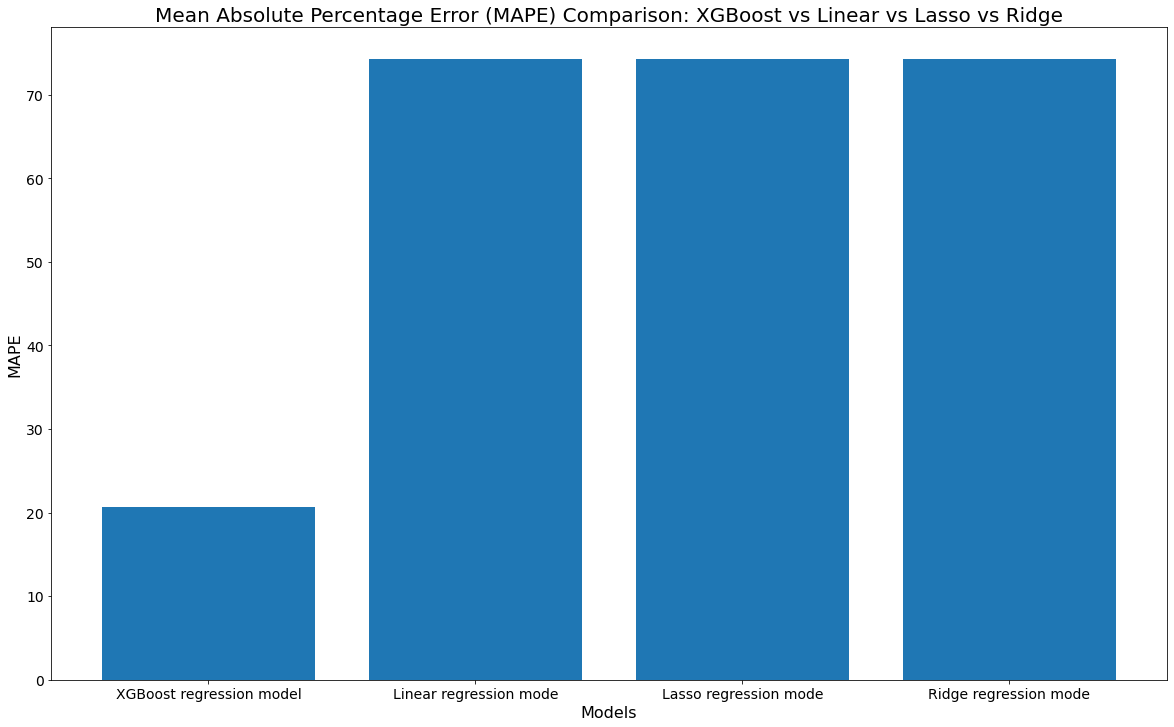

In [207]:
import matplotlib.pyplot as plt

# MAPE values
mape_values = [mape_xgb, mape_linear, mape_lasso, mape_ridge]

# Model names
models = ["XGBoost regression model", "Linear regression mode", "Lasso regression mode", "Ridge regression mode"]

# Set font sizes
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


# Create a bar plot
plt.figure(figsize=(20, 12))
plt.bar(models, mape_values)

# Set plot title and labels
plt.title("Mean Absolute Percentage Error (MAPE) Comparison: XGBoost vs Linear vs Lasso vs Ridge")
plt.xlabel("Models")
plt.ylabel("MAPE")

# Show the plot
plt.show()


Based on the results got, the XGBoost model has a significantly lower Mean Absolute Percentage Error (MAPE) compared to the Linear, Lasso, and Ridge regression models.

- XGBoost MAPE: 20.67
- Linear Regression MAPE: 74.33
- Lasso Regression MAPE: 74.30
- Ridge Regression MAPE: 74.30

This indicates that the XGBoost model is performing better in terms of prediction accuracy. The lower MAPE value for XGBoost suggests that this model is better at capturing the underlying patterns in the data and generalizing to the test dataset. The higher MAPE values for the Linear, Lasso, and Ridge regression models indicate that they are not as effective at predicting the target variable Estimated Shares Outstanding.

In summary, the XGBoost model has demonstrated superior performance compared to the other three models in this case.